In [1]:
from langmuir_LR.basic import lp_Settings
from langmuir_LR import compute
from langmuir_LR.eedf import compute_eedf,EEDFBundle,plot_eedf_vs_maxwellian,normalize_eedf
from langmuir_LR import basic
import seaborn as sns
import pandas as pd
from functools import wraps
import matplotlib.pyplot as plt




In [2]:
#class instance, set temp and material properties. Unchanging for this analysis
c1 = lp_Settings() 
c1.set_m_i(40) 
c1.set_T_eV(300)
c1.set_skipheader(61)
c1.set_skipfooter(5)

In [3]:
c1.set_params(float('97.0'), 400, 1, 6)
c1.set_probe_l(4e-3)


In [4]:
c1.fname_fmt

'Trace_97p0mTorr_400W_6in_1.csv'

In [5]:
V,I,coeffs = basic.read_file(c1,11)
print("V:", V)
print("I:", I)

V: [-20.01105118 -19.96114731 -19.91096497 ...  29.90875244  29.95626831
  30.00738525]
I: [-1.99116112e-05 -1.98550460e-05 -1.98375928e-05 ...  1.00880500e-03
  1.01049303e-03  1.01236941e-03]


In [6]:
Vf = basic.floating_potential(V,coeffs)
print("Floating Potential: ", Vf, " V")

Vp,Ip = basic.plasma_potential(V,coeffs)


Floating Potential:  2.8788938895196616  V


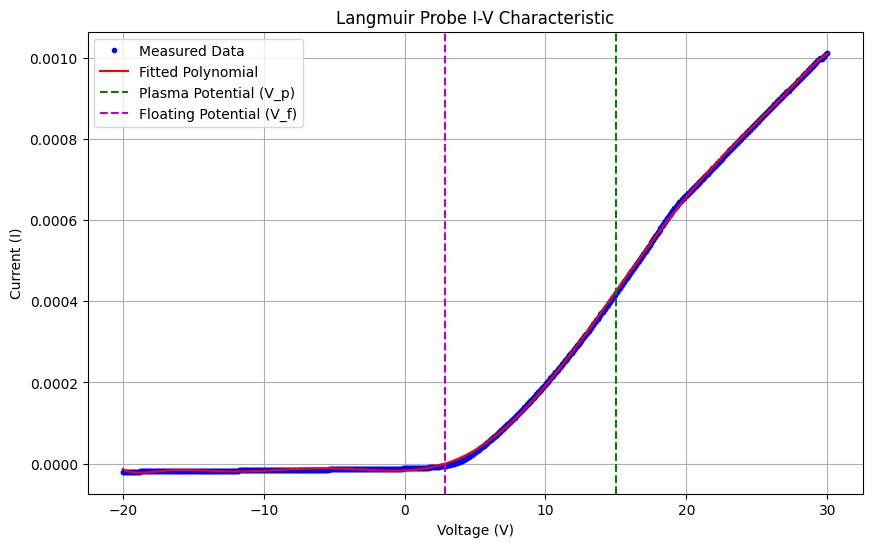

In [7]:
basic.plot_IV(V,I,coeffs,Vp,Vf)

In [8]:
te,ne,ie = compute.find_ne_te_iterative(c1)
print(ne)

Maximum iterations reached without convergence.
1.1479520531279633e+18


In [9]:
E_eV_sorted, p_eV_sorted, f_eV_sorted, d2I_sorted, scale = eedf.eedf_data(c1,ie,ne)

/var/folders/58/pdx1mmvd2jb5j0w0yb44y5jm0000gn/T/ipykernel_19502/691897783.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(E_eV_sorted, f_eV_sorted/sum(f_eV_sorted), label='EEdata_all')


(0.0, 20.0)

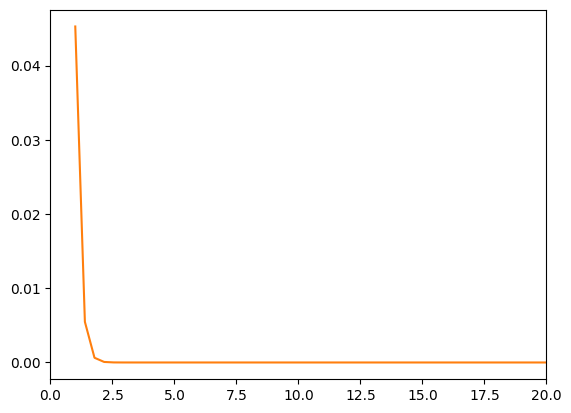

In [10]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(E_eV_sorted, f_eV_sorted/sum(f_eV_sorted), label='EEdata_all')
plt.plot(np.linspace(1,20), eedf.maxwellian((np.linspace(1,20)),te),label = 'Ideal')
plt.xlim(0,20)

In [11]:
#pressure : (power, idx)

data_0in = [
    ('16.6', 1000, 1, 0),
    ('16.6', 1000, 2, 0),
    ('16.6', 1000, 3, 0),
    ('16.6', 1000, 4, 0),
    ('16.6', 1000, 5, 0),
    ('10.8', 400, 1, 0),
    ('10.8', 400, 2, 0),
    ('10.8', 400, 3, 0),
    ('10.8', 400, 4, 0),
    ('10.8', 400, 5, 0),
    ('13.9', 600, 1, 0),
    ('13.9', 600, 2, 0),
    ('13.9', 600, 3, 0),
    ('13.9', 600, 4, 0),
    ('13.9', 600, 5, 0),
    ('17.5', 800, 1, 0),
    ('17.5', 800, 2, 0),
    ('17.5', 800, 3, 0),
    ('17.5', 800, 4, 0),
    ('17.5', 800, 5, 0),
    ('42.1', 1000, 1, 0),
    ('42.1', 1000, 2, 0),
    ('42.1', 1000, 3, 0),
    ('42.1', 1000, 4, 0),
    ('42.1', 1000, 5, 0),
    ('41.0', 400, 1, 0),
    ('41.0', 400, 2, 0),
    ('41.0', 400, 3, 0),
    ('41.0', 400, 4, 0),
    ('41.0', 400, 5, 0),
    ('41.1', 600, 1, 0),
    ('41.1', 600, 2, 0),
    ('41.1', 600, 3, 0),
    ('41.1', 600, 4, 0),
    ('41.1', 600, 5, 0),
    ('41.5', 800, 1, 0),
    ('41.5', 800, 2, 0),
    ('41.5', 800, 3, 0),
    ('41.5', 800, 4, 0),
    ('41.5', 800, 5, 0),
    ('75.1', 1000, 1, 0),
    ('75.1', 1000, 2, 0),
    ('75.1', 1000, 3, 0),
    ('75.1', 1000, 4, 0),
    ('75.1', 1000, 5, 0),
    ('72.5', 400, 1, 0),
    ('72.5', 400, 2, 0),
    ('72.5', 400, 3, 0),
    ('72.5', 400, 4, 0),
    ('72.5', 400, 5, 0),
    ('73.5', 600, 1, 0),
    ('73.5', 600, 2, 0),
    ('73.5', 600, 3, 0),
    ('73.5', 600, 4, 0),
    ('73.5', 600, 5, 0),
    ('74.3', 800, 1, 0),
    ('74.3', 800, 2, 0),
    ('74.3', 800, 3, 0),
    ('74.3', 800, 4, 0),
    ('74.3', 800, 5, 0),
    ('98.5', 1000, 1, 0),
    ('98.5', 1000, 2, 0),
    ('98.5', 1000, 3, 0),
    ('98.5', 1000, 4, 0),
    ('98.5', 1000, 5, 0),
    ('96.8', 400, 1, 0),
    ('96.8', 400, 2, 0),
    ('96.8', 400, 3, 0),
    ('96.8', 400, 4, 0),
    ('96.8', 400, 5, 0),
    ('96.8', 600, 1, 0),
    ('96.8', 600, 2, 0),
    ('96.8', 600, 3, 0),
    ('96.8', 600, 4, 0),
    ('96.8', 600, 5, 0),
    ('97.5', 800, 1, 0),
    ('97.5', 800, 2, 0),
    ('97.5', 800, 3, 0),
    ('97.5', 800, 4, 0),
    ('97.5', 800, 5, 0)
]

data_2in = [
    ('41.3', 400, 1, 2),
    ('41.3', 400, 2, 2),
    ('41.3', 400, 3, 2),
    ('41.3', 600, 1, 2),
    ('41.3', 600, 2, 2),
    ('41.3', 600, 3, 2),
    ('41.3', 800, 1, 2),
    ('41.3', 800, 2, 2),
    ('41.3', 800, 3, 2),
    ('41.6', 1000, 1, 2),
    ('41.6', 1000, 2, 2),
    ('41.6', 1000, 3, 2),
    ('97.8', 400, 1, 2),
    ('97.8', 400, 2, 2),
    ('97.8', 400, 3, 2),
    ('98.2', 600, 1, 2),
    ('98.2', 600, 2, 2),
    ('98.2', 600, 3, 2),
    ('98.2', 800, 1, 2),
    ('98.2', 800, 2, 2),
    ('98.2', 800, 3, 2),
    ('98.8', 1000, 1, 2),
    ('98.8', 1000, 2, 2),
    ('98.8', 1000, 3, 2)
]

data_4in = [
    ('40.9', 400, 1, 4),
    ('40.9', 400, 2, 4),
    ('40.9', 400, 3, 4),
    ('40.9', 600, 1, 4),
    ('40.9', 600, 2, 4),
    ('40.9', 600, 3, 4),
    ('41.2', 800, 1, 4),
    ('41.2', 800, 2, 4),
    ('41.2', 800, 3, 4),
    ('41.2', 1000, 1, 4),
    ('41.2', 1000, 2, 4),
    ('41.2', 1000, 3, 4),
    ('97.2', 400, 1, 4),
    ('97.2', 400, 2, 4),
    ('97.2', 400, 3, 4),
    ('98.0', 600, 1, 4),
    ('98.0', 600, 2, 4),
    ('98.0', 600, 3, 4),
    ('98.4', 800, 1, 4),
    ('98.4', 800, 2, 4),
    ('98.4', 800, 3, 4),
    ('98.9', 1000, 1, 4),
    ('98.9', 1000, 2, 4),
    ('98.9', 1000, 3, 4)
]

data_6in = [
    ('40.8', 400, 1, 6),
    ('40.8', 400, 2, 6),
    ('40.8', 400, 3, 6),
    ('41.0', 600, 1, 6),
    ('41.0', 600, 2, 6),
    ('41.0', 600, 3, 6),
    ('41.1', 800, 1, 6),
    ('41.1', 800, 2, 6),
    ('41.1', 800, 3, 6),
    ('41.2', 1000, 1, 6),
    ('41.2', 1000, 2, 6),
    ('41.2', 1000, 3, 6),
    ('97.0', 400, 1, 6),
    ('97.0', 400, 2, 6),
    ('97.0', 400, 3, 6),
    ('97.6', 600, 1, 6),
    ('97.6', 600, 2, 6),
    ('97.6', 600, 3, 6),
    ('98.1', 800, 1, 6),
    ('98.1', 800, 2, 6),
    ('98.1', 800, 3, 6),
    ('98.5', 1000, 1, 6),
    ('98.5', 1000, 2, 6),
    ('98.5', 1000, 3, 6)
]






In [12]:
temp_setting = lp_Settings()

data_arr_0 = np.zeros((len(data_0in),6))
ie_list_0 = np.zeros((len(data_0in),1)).tolist()

for i,tup in enumerate(data_0in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2])
    
    try:
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)
    except:
        continue
    data_arr_0[i][0] = float(tup[0])
    data_arr_0[i][1] = tup[1]
    data_arr_0[i][2] = tup[2]
    data_arr_0[i][3] = tup[3]
    data_arr_0[i][4] = ne
    data_arr_0[i][5] = te
    ie_list_0[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")


Converged after 241 iterations.
Processed ('16.6', 1000, 1, 0), ne: 8.994785290359106e+18, te: 1.4218351275037728, ie: [-0.00669778 -0.00669195 -0.00668469 ...  0.01442698  0.01446548
  0.01450875]
Maximum iterations reached without convergence.
Processed ('16.6', 1000, 2, 0), ne: 8.990825453709066e+18, te: 1.460161435273119, ie: [-0.00680467 -0.00680598 -0.00680511 ...  0.01475135  0.01478936
  0.01483382]
Converged after 499 iterations.
Processed ('16.6', 1000, 3, 0), ne: 8.969342542419114e+18, te: 1.4433264465652074, ie: [-0.00679791 -0.00679768 -0.00679678 ...  0.01503407  0.01507384
  0.01511989]
Converged after 893 iterations.
Processed ('16.6', 1000, 4, 0), ne: 8.984160559715062e+18, te: 1.4538346960864585, ie: [-0.0068355  -0.00683136 -0.00682974 ...  0.01526389  0.01530557
  0.01535304]
Converged after 397 iterations.
Processed ('16.6', 1000, 5, 0), ne: 8.950581291284218e+18, te: 1.43393802322275, ie: [-0.00680459 -0.00680455 -0.00680313 ...  0.01555628  0.01559814
  0.0156454

In [13]:
data_arr_2 = np.zeros((len(data_2in),6))
ie_list_2 = np.zeros((len(data_2in),1)).tolist()

temp_setting.set_probe_l(4e-3)


for i,tup in enumerate(data_2in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2],tup[3])
    print(temp_setting.fname_fmt)

    try:
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)
    except:
        continue

    data_arr_2[i][0] = float(tup[0])
    data_arr_2[i][1] = tup[1]
    data_arr_2[i][2] = tup[2]
    data_arr_2[i][3] = tup[3]
    data_arr_2[i][4] = ne
    data_arr_2[i][5] = te
    ie_list_2[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")


data_arr_4 = np.zeros((len(data_4in),6))
ie_list_4 = np.zeros((len(data_4in),1)).tolist()
for i,tup in enumerate(data_4in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2],tup[3])
    try:
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)
    except:
        continue
    data_arr_4[i][0] = float(tup[0])
    data_arr_4[i][1] = tup[1]
    data_arr_4[i][2] = tup[2]
    data_arr_4[i][3] = tup[3]
    data_arr_4[i][4] = ne
    data_arr_4[i][5] = te
    ie_list_4[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")

data_arr_6 = np.zeros((len(data_6in),6))
ie_list_6 = np.zeros((len(data_6in),1)).tolist()
for i,tup in enumerate(data_6in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2],tup[3])
    try:
    
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)

    except:
        print(Exception)
        continue
    data_arr_6[i][0] = float(tup[0])
    data_arr_6[i][1] = tup[1]
    data_arr_6[i][2] = tup[2]
    data_arr_6[i][3] = tup[3]
    data_arr_6[i][4] = ne
    data_arr_6[i][5] = te
    ie_list_6[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")


Trace_41p3mTorr_400W_2in_1.csv
Converged after 146 iterations.
Processed ('41.3', 400, 1, 2), ne: 3.67923106865761e+18, te: 0.8741321545515479, ie: [-0.00213783 -0.00213766 -0.00213751 ...  0.00597607  0.00598588
  0.00599761]
Trace_41p3mTorr_400W_2in_2.csv
Maximum iterations reached without convergence.
Processed ('41.3', 400, 2, 2), ne: 3.532330467460071e+18, te: 0.9541009302013644, ie: [-0.00214683 -0.00214669 -0.00214656 ...  0.00584887  0.00587573
  0.00588682]
Trace_41p3mTorr_400W_2in_3.csv
Maximum iterations reached without convergence.
Processed ('41.3', 400, 3, 2), ne: 3.4149031064612797e+18, te: 1.0139198128411346, ie: [-0.00213441 -0.00213427 -0.00213414 ...  0.00584781  0.00585788
  0.00587049]
Trace_41p3mTorr_600W_2in_1.csv
Converged after 71 iterations.
Processed ('41.3', 600, 1, 2), ne: 5.330356692650635e+18, te: 1.0495468730707813, ie: [-0.00324758 -0.00324743 -0.00324728 ...  0.00904151  0.00905853
  0.00907812]
Trace_41p3mTorr_600W_2in_2.csv
Maximum iterations reached

In [14]:


cols = ['Pressure', 'Power', 'Trial', 'Length', 'ne', 'Te']

data0 = pd.DataFrame(data_arr_0, columns=cols)
data2 = pd.DataFrame(data_arr_2, columns=cols)
data4 = pd.DataFrame(data_arr_4, columns=cols)
data6 = pd.DataFrame(data_arr_6, columns=cols)


data_all = pd.concat([data0, data2, data4, data6], ignore_index=True)

mask = data_all['Pressure'] > 0
data_all = data_all[mask]

np.unique(data_all.Pressure)


array([10.8, 13.9, 16.6, 17.5, 40.8, 40.9, 41. , 41.1, 41.2, 41.3, 41.5,
       41.6, 42.1, 72.5, 73.5, 74.3, 75.1, 96.8, 97. , 97.2, 97.5, 97.6,
       97.8, 98. , 98.1, 98.2, 98.4, 98.5, 98.8, 98.9])

[ 400.  600.  800. 1000.]
[1.69375302e+19 1.62785678e+19 1.06467317e+19 8.97793903e+18]
[ 400.  600.  800. 1000.]
[2.22554999e+18 5.23503501e+18 1.05119873e+19 1.96583031e+19]
[ 400.  600.  800. 1000.]
[2.94749401e+18 3.47600612e+18 5.24620756e+18 6.89116742e+18]
[ 400.  600.  800. 1000.]
[1.22473117e+18 3.10325148e+18 5.11179317e+18 8.18975055e+18]
[ 400.  600.  800. 1000.]
[2.03297615 2.01845574 2.44263016 1.44261915]
[ 400.  600.  800. 1000.]
[0.84052117 0.46446939 0.75857863 1.04580167]
[ 400.  600.  800. 1000.]
[0.76131024 0.54672656 0.67970155 0.84671013]
[ 400.  600.  800. 1000.]
[0.59741703 0.30340248 0.49461879 0.69923228]


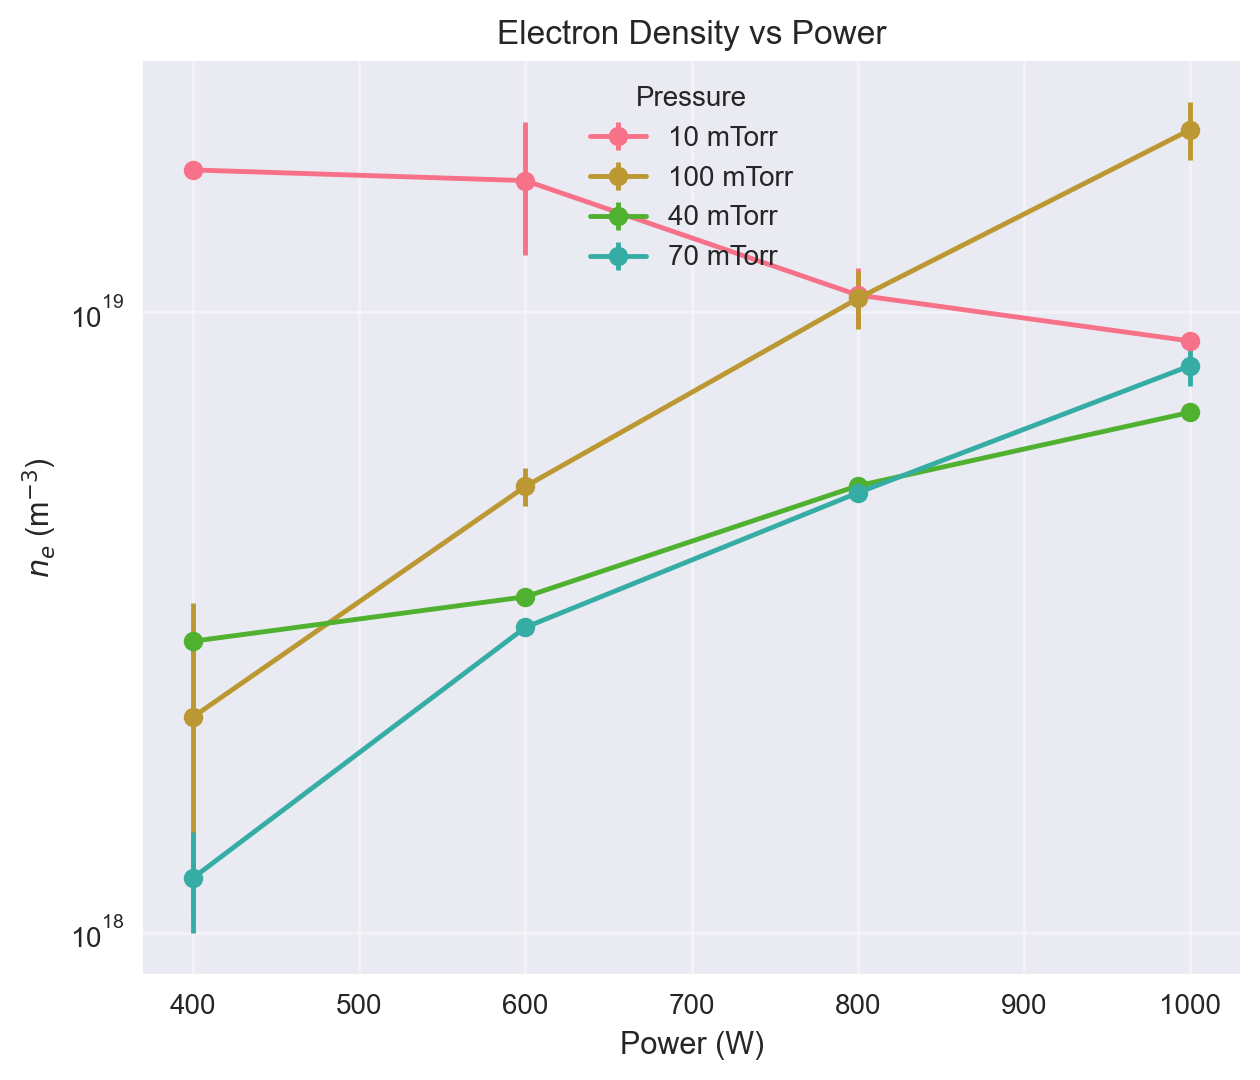

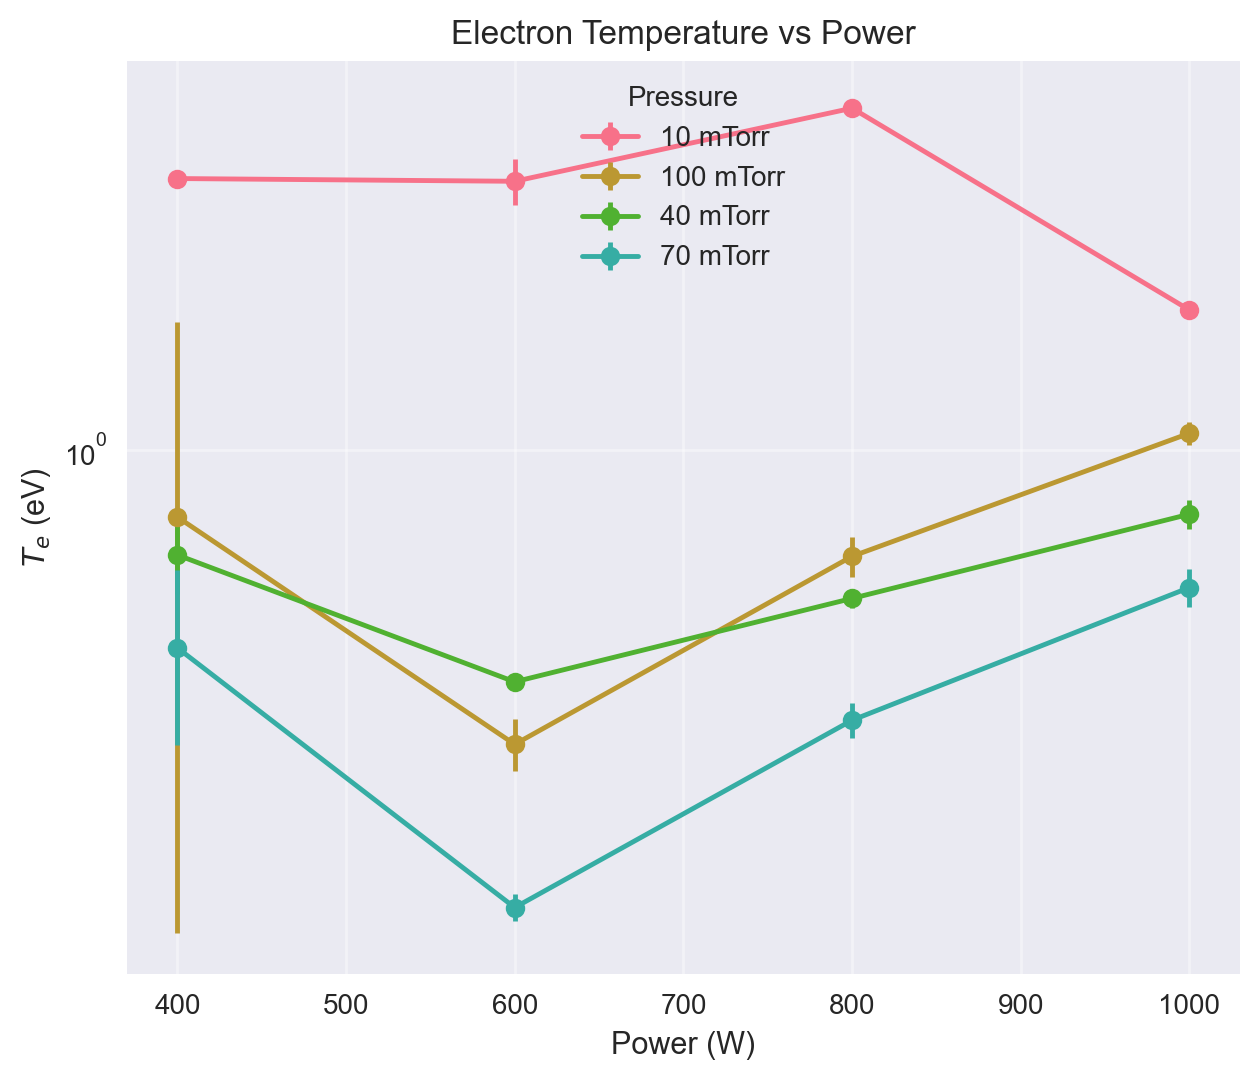

[10.8 41.  72.5 96.8]
[1.69375302e+19 2.94749401e+18 1.22473117e+18 2.22554999e+18]
[13.9 41.1 73.5 96.8]
[1.62785678e+19 3.47600612e+18 3.10325148e+18 5.23503501e+18]
[17.5 41.5 74.3 97.5]
[1.06467317e+19 5.24620756e+18 5.11179317e+18 1.05119873e+19]
[16.6 42.1 75.1 98.5]
[8.97793903e+18 6.89116742e+18 8.18975055e+18 1.96583031e+19]
[10.8 41.  72.5 96.8]
[2.03297615 0.76131024 0.59741703 0.84052117]
[13.9 41.1 73.5 96.8]
[2.01845574 0.54672656 0.30340248 0.46446939]
[17.5 41.5 74.3 97.5]
[2.44263016 0.67970155 0.49461879 0.75857863]
[16.6 42.1 75.1 98.5]
[1.44261915 0.84671013 0.69923228 1.04580167]


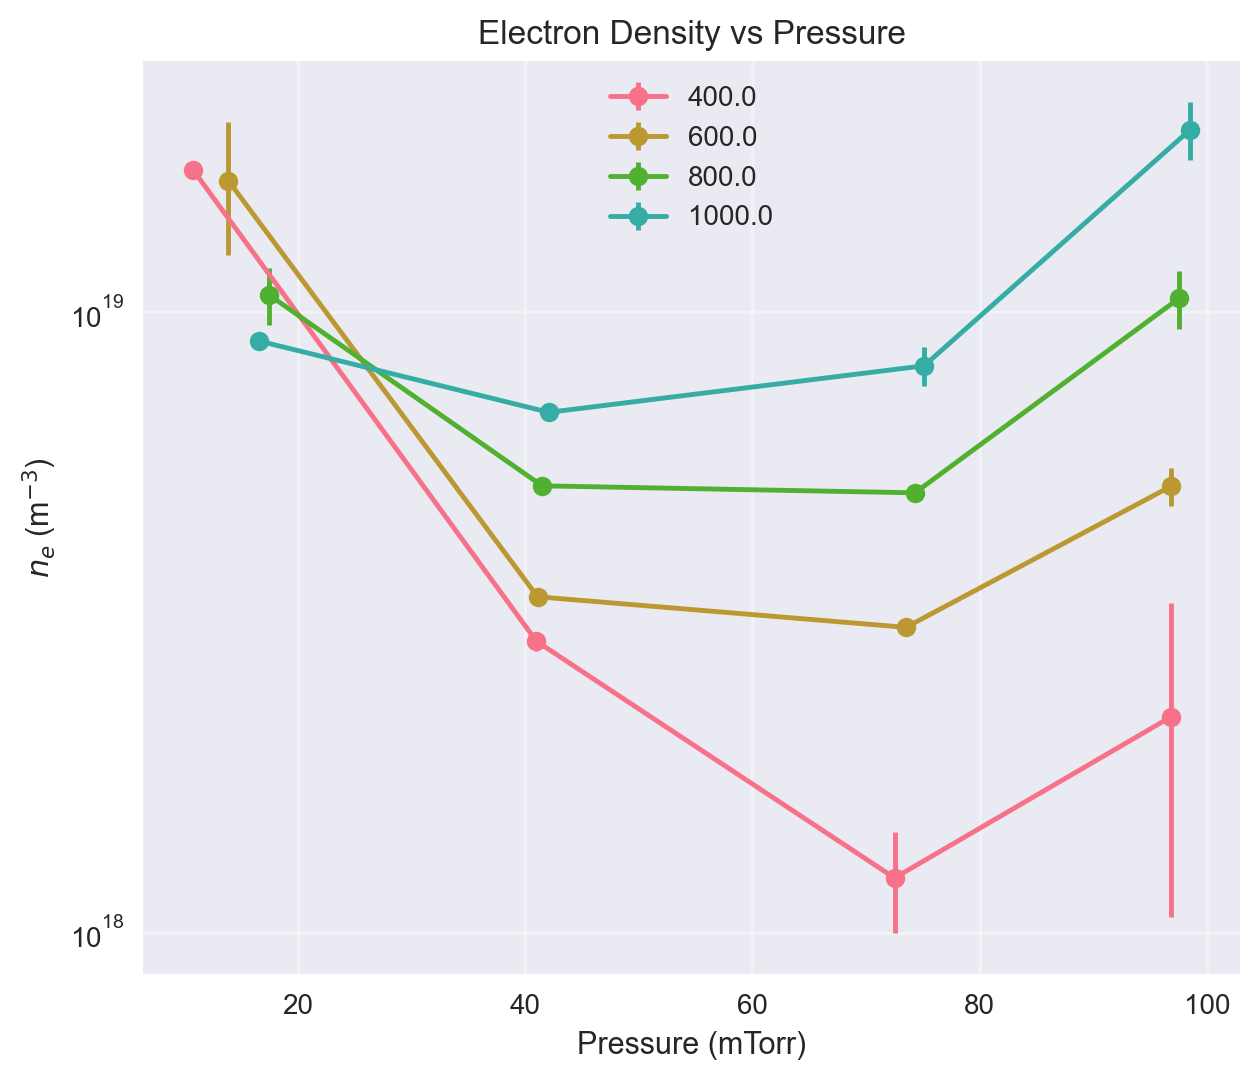

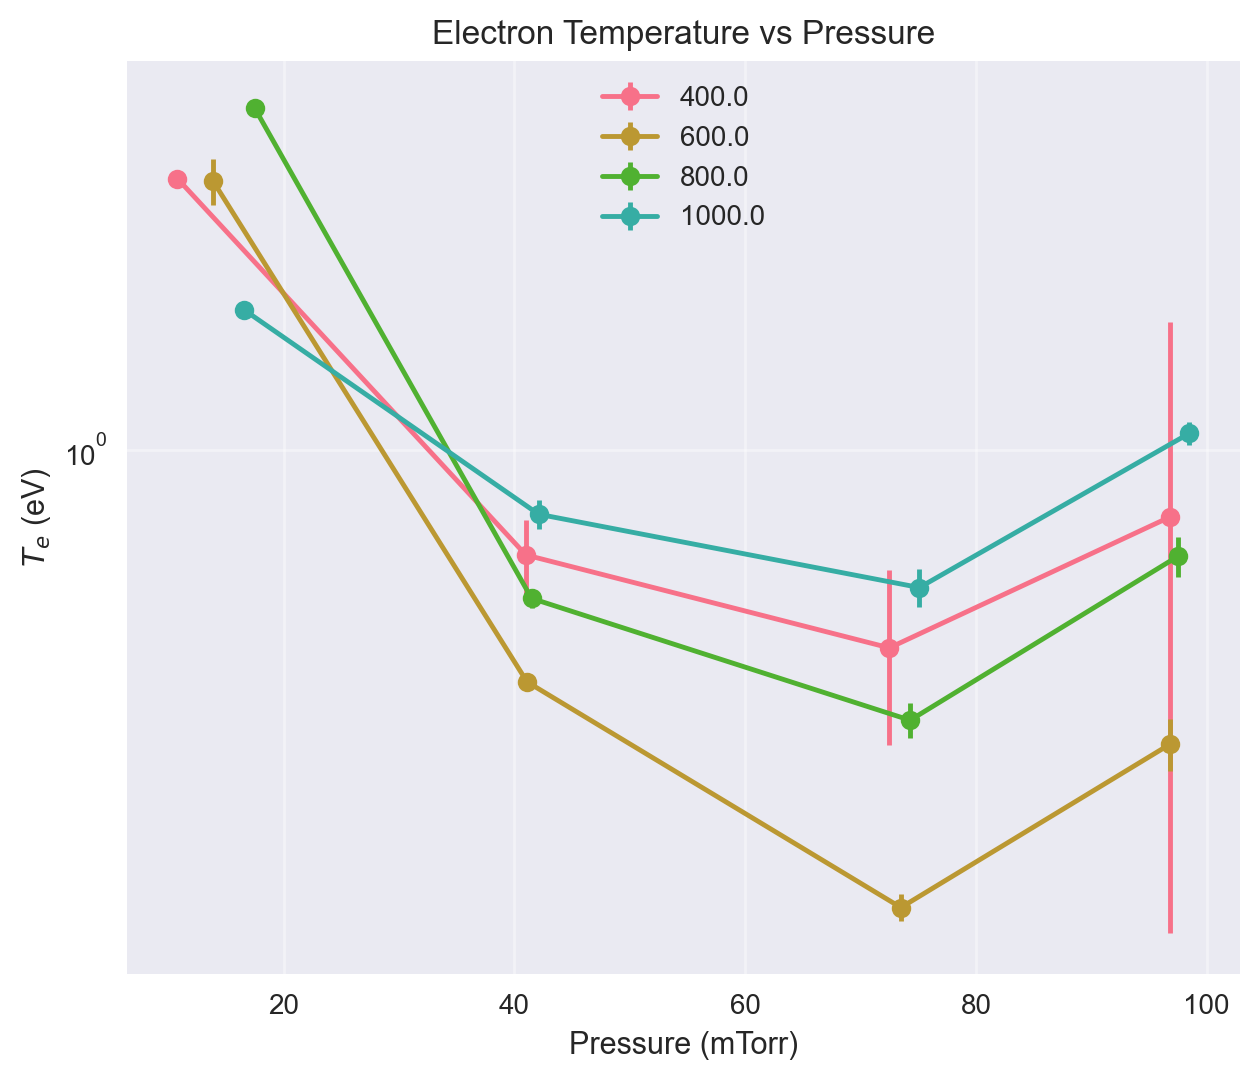

[0.]
[1.32101922e+19]
[0. 2. 4. 6.]
[9.40771883e+18 7.01444417e+18 3.77499504e+18 9.83043909e+17]
[0. 2. 4. 6.]
[4.64021878e+18 6.38579486e+18 5.85063863e+18 2.23853378e+18]
[0.]
[4.40738159e+18]
[0.]
[1.9841703]
[0. 2. 4. 6.]
[0.77734271 0.94739947 0.98904439 1.11090619]
[0. 2. 4. 6.]
[0.70861212 1.13692348 1.04637216 0.94210528]
[0.]
[0.52366765]


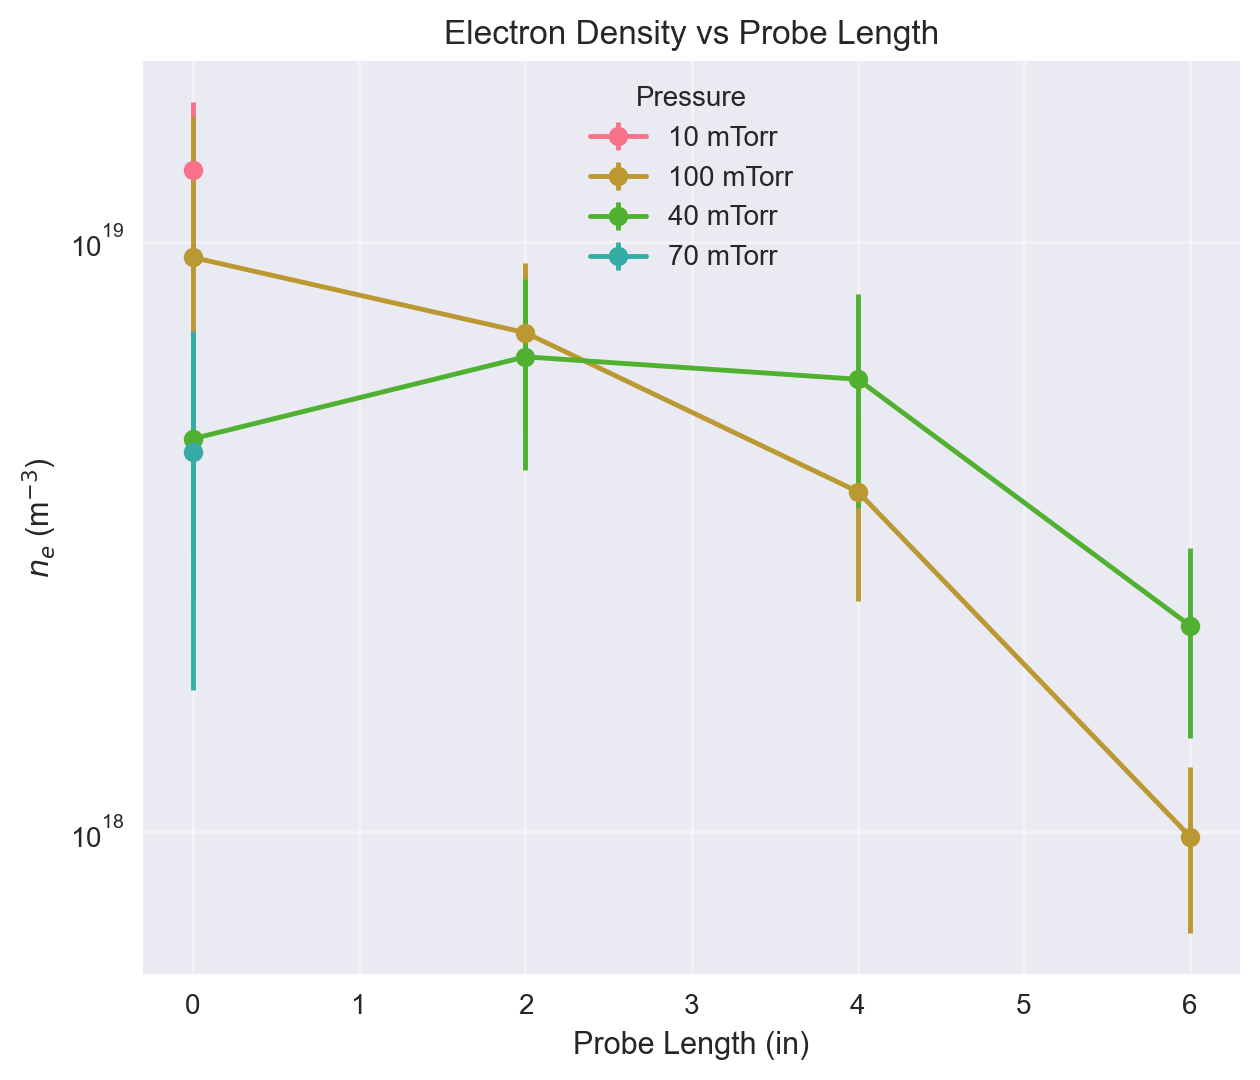

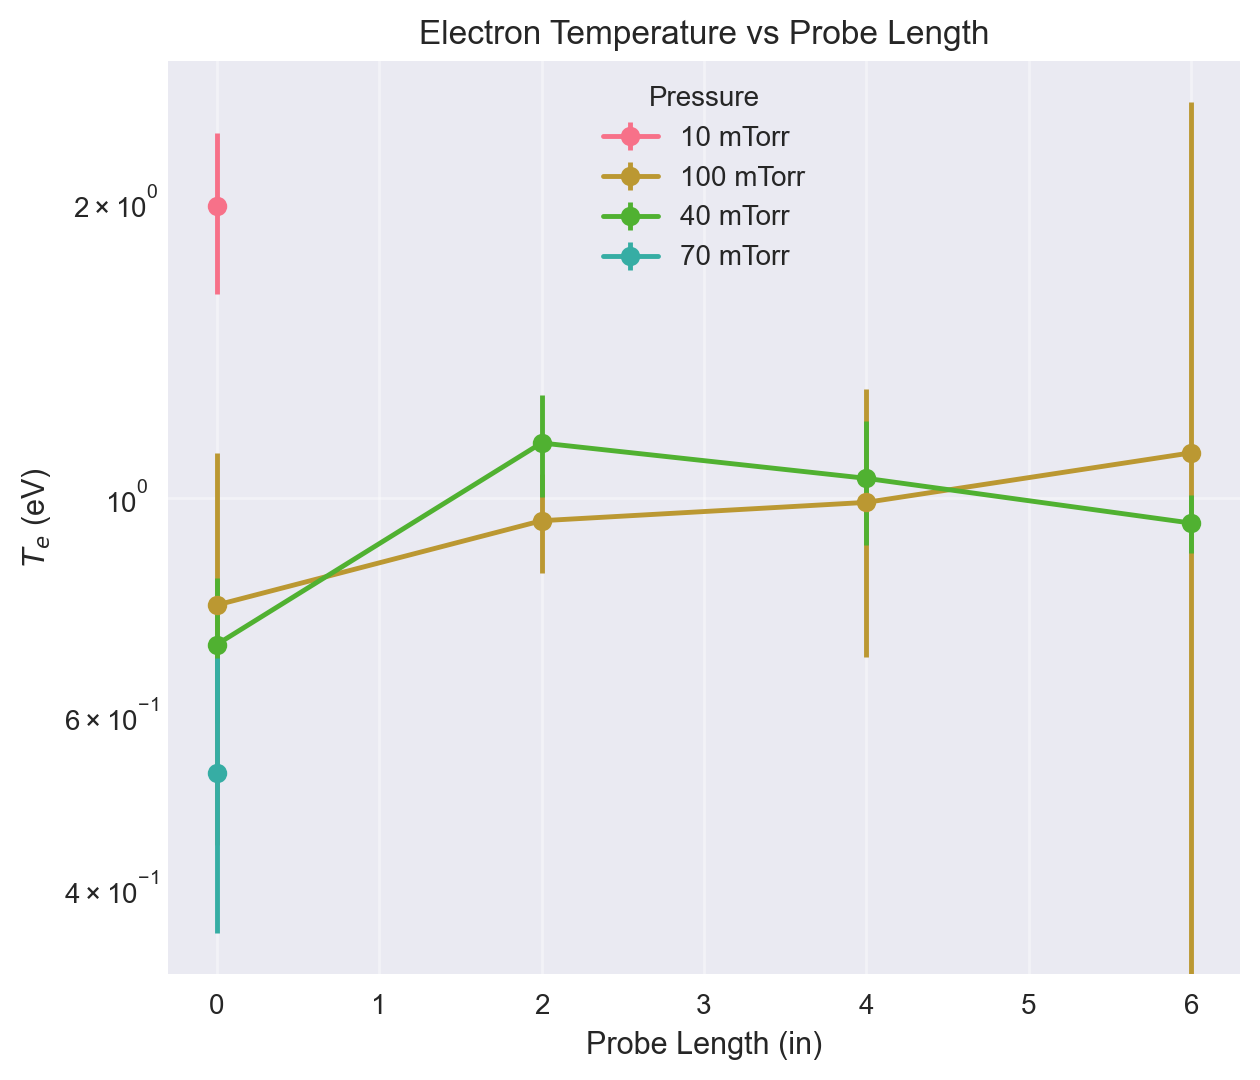

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

bins = [0, 20, 50, 80, 110]
labels = ['10 mTorr', '40 mTorr', '70 mTorr', '100 mTorr']
data_all['PressureGroup'] = pd.cut(data_all['Pressure'], bins=bins, labels=labels, include_lowest=True)

def plot_grouped(data, xcol, groupcol, ycol, xlabel, ylabel, title, logy=True, legend_outside=True):
    plt.figure(dpi=200)
    for g in sorted(data[groupcol].dropna().unique()):
        sub = data[data[groupcol] == g]
        grouped = sub.groupby(xcol).agg({ycol: ['mean', 'std']})
        x = grouped.index.values
        y = grouped[ycol]['mean'].values
        yerr = grouped[ycol]['std'].values
        plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=4, label=f'{g}')
        print(x)
        print(y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.xlim((min(data[x]) * 0.9, max(data[x]) * 1.1))
    plt.title(title)
    plt.grid(True, alpha=0.4)
    
    if logy:
        plt.yscale('log')

    plt.legend(title=groupcol[:-5],loc = 'upper center')
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave room for legend outside

data_len0 = data_all[data_all['Length'] == 0]
plot_grouped(data_len0, 'Power', 'PressureGroup', 'ne',
             'Power (W)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Power')
plot_grouped(data_len0, 'Power', 'PressureGroup', 'Te',
             'Power (W)', r'$T_e$ (eV)', 'Electron Temperature vs Power')
plt.show()

plot_grouped(data_len0, 'Pressure', 'Power', 'ne',
             'Pressure (mTorr)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Pressure')
plot_grouped(data_len0, 'Pressure', 'Power', 'Te',
             'Pressure (mTorr)', r'$T_e$ (eV)', 'Electron Temperature vs Pressure')
plt.show()

plot_grouped(data_all, 'Length', 'PressureGroup', 'ne',
             'Probe Length (in)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Probe Length')
plot_grouped(data_all, 'Length', 'PressureGroup', 'Te',
             'Probe Length (in)', r'$T_e$ (eV)', 'Electron Temperature vs Probe Length')
plt.show()


Plotting for Length = 0.0 ...
[ 400.  600.  800. 1000.]
[1.69375302e+19 1.62785678e+19 1.06467317e+19 8.97793903e+18]
[ 400.  600.  800. 1000.]
[2.22554999e+18 5.23503501e+18 1.05119873e+19 1.96583031e+19]
[ 400.  600.  800. 1000.]
[2.94749401e+18 3.47600612e+18 5.24620756e+18 6.89116742e+18]
[ 400.  600.  800. 1000.]
[1.22473117e+18 3.10325148e+18 5.11179317e+18 8.18975055e+18]
[ 400.  600.  800. 1000.]
[2.03297615 2.01845574 2.44263016 1.44261915]
[ 400.  600.  800. 1000.]
[0.84052117 0.46446939 0.75857863 1.04580167]
[ 400.  600.  800. 1000.]
[0.76131024 0.54672656 0.67970155 0.84671013]
[ 400.  600.  800. 1000.]
[0.59741703 0.30340248 0.49461879 0.69923228]
[10.8 41.  72.5 96.8]
[1.69375302e+19 2.94749401e+18 1.22473117e+18 2.22554999e+18]
[13.9 41.1 73.5 96.8]
[1.62785678e+19 3.47600612e+18 3.10325148e+18 5.23503501e+18]
[17.5 41.5 74.3 97.5]
[1.06467317e+19 5.24620756e+18 5.11179317e+18 1.05119873e+19]
[16.6 42.1 75.1 98.5]
[8.97793903e+18 6.89116742e+18 8.18975055e+18 1.96583031

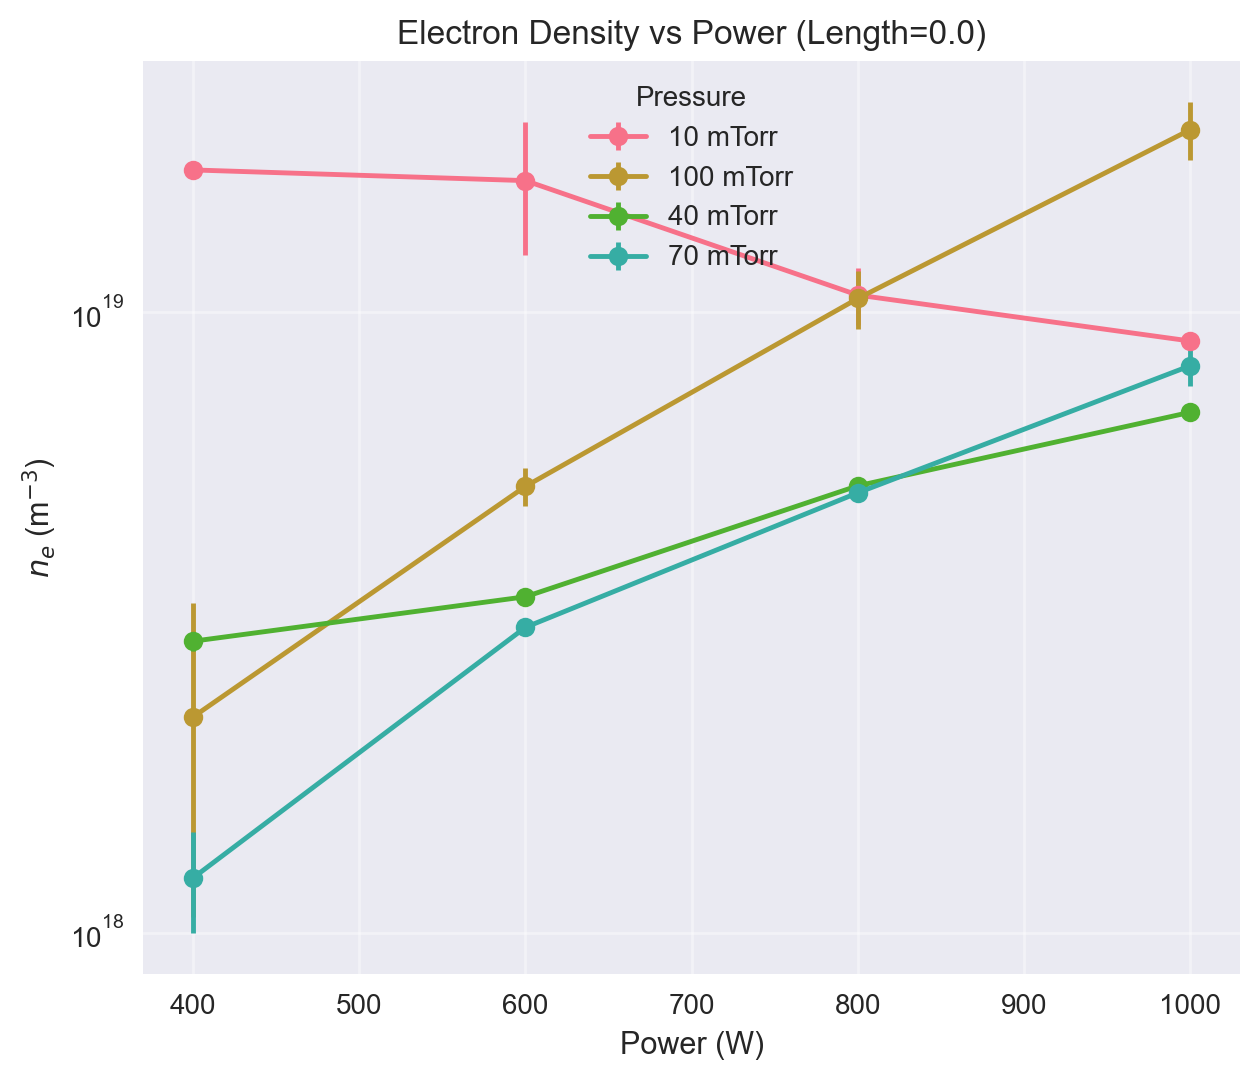

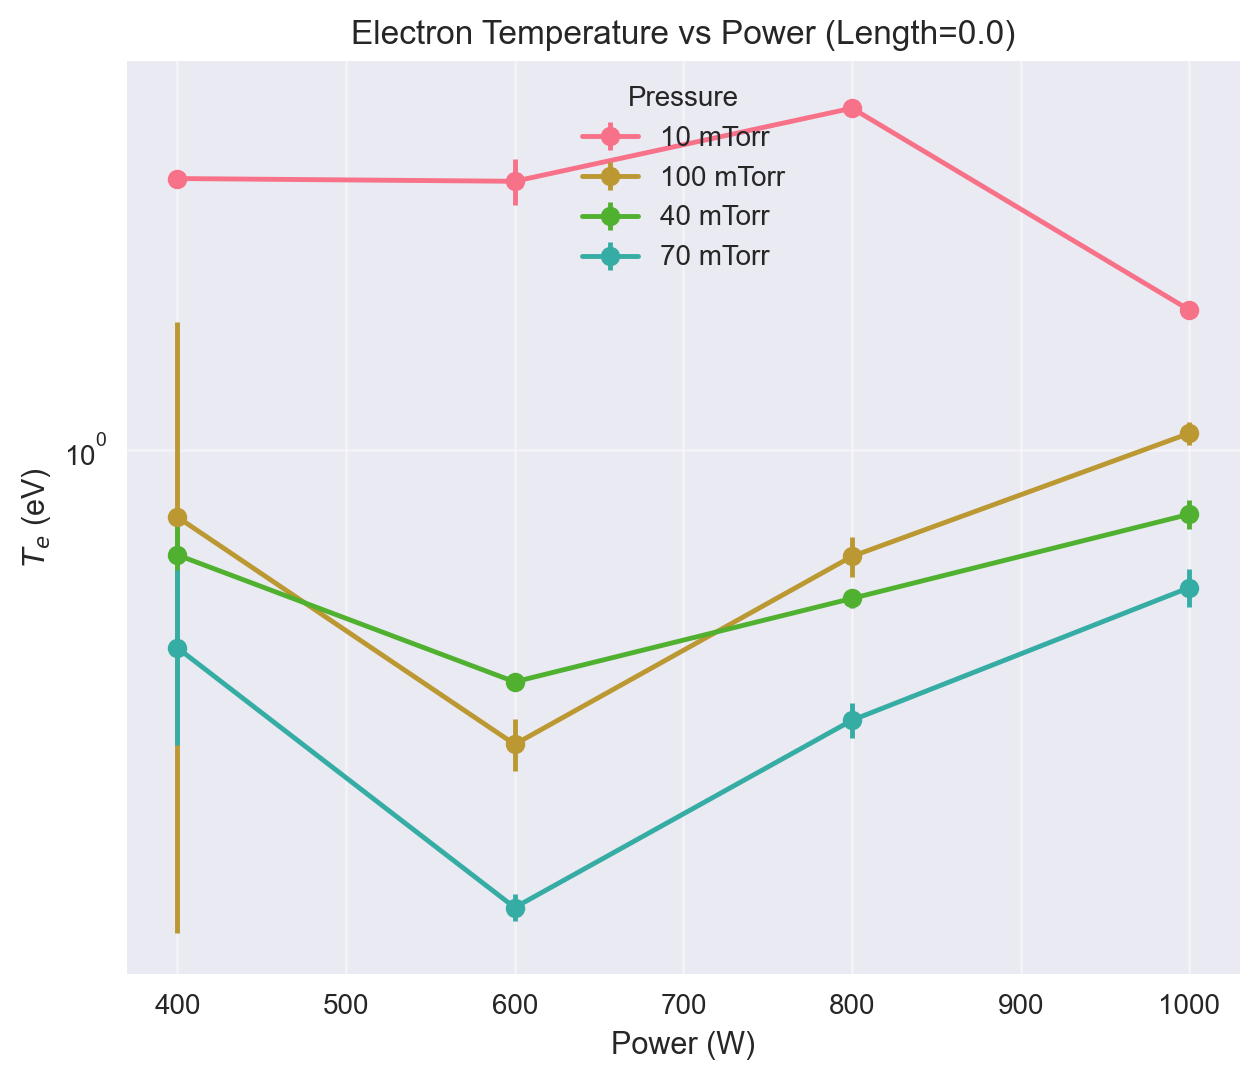

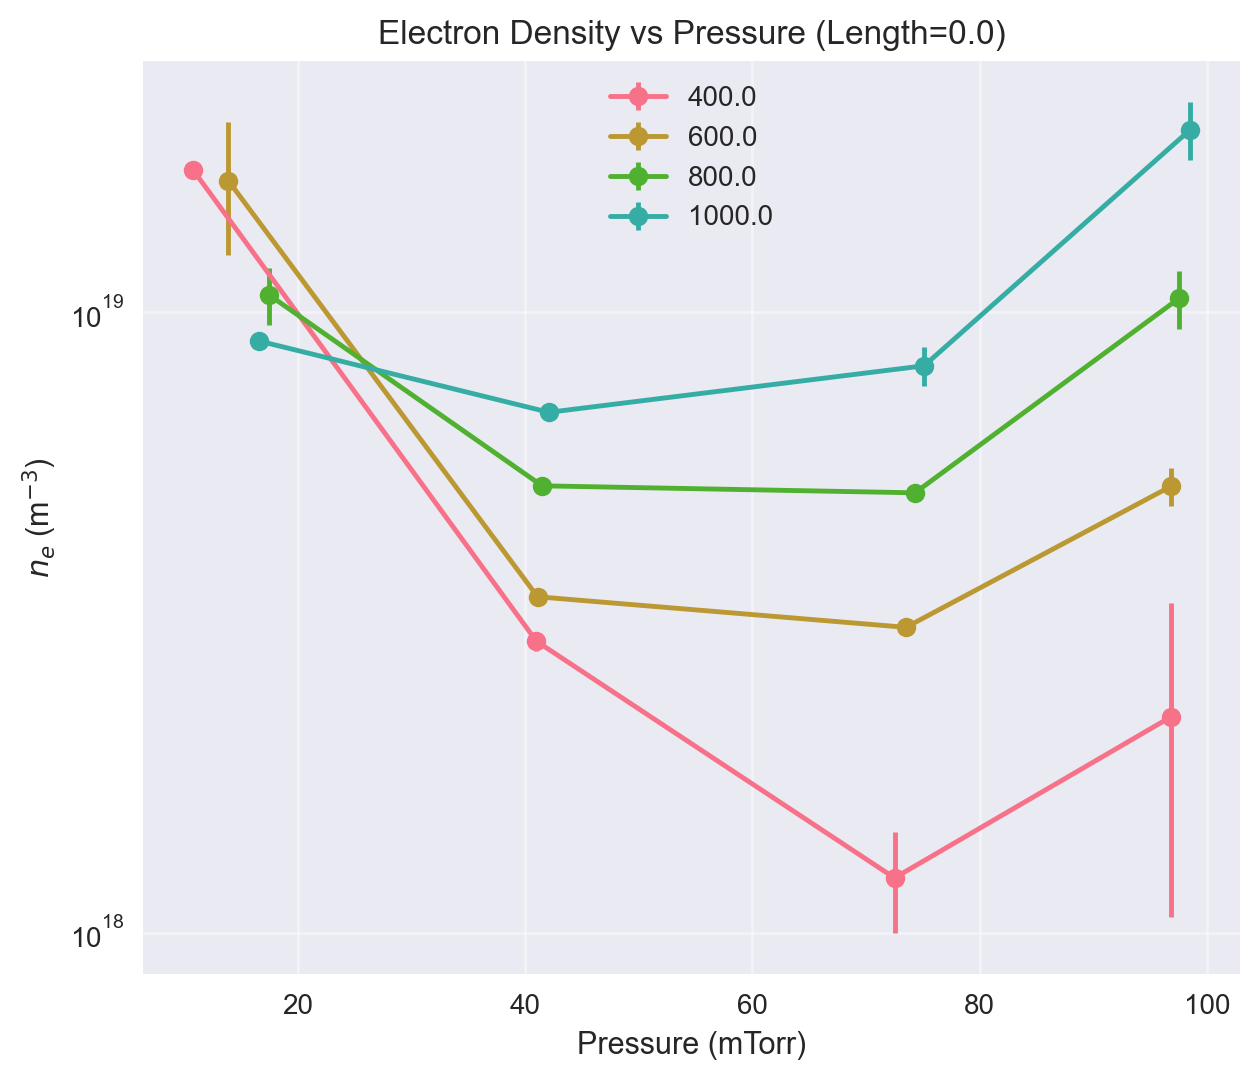

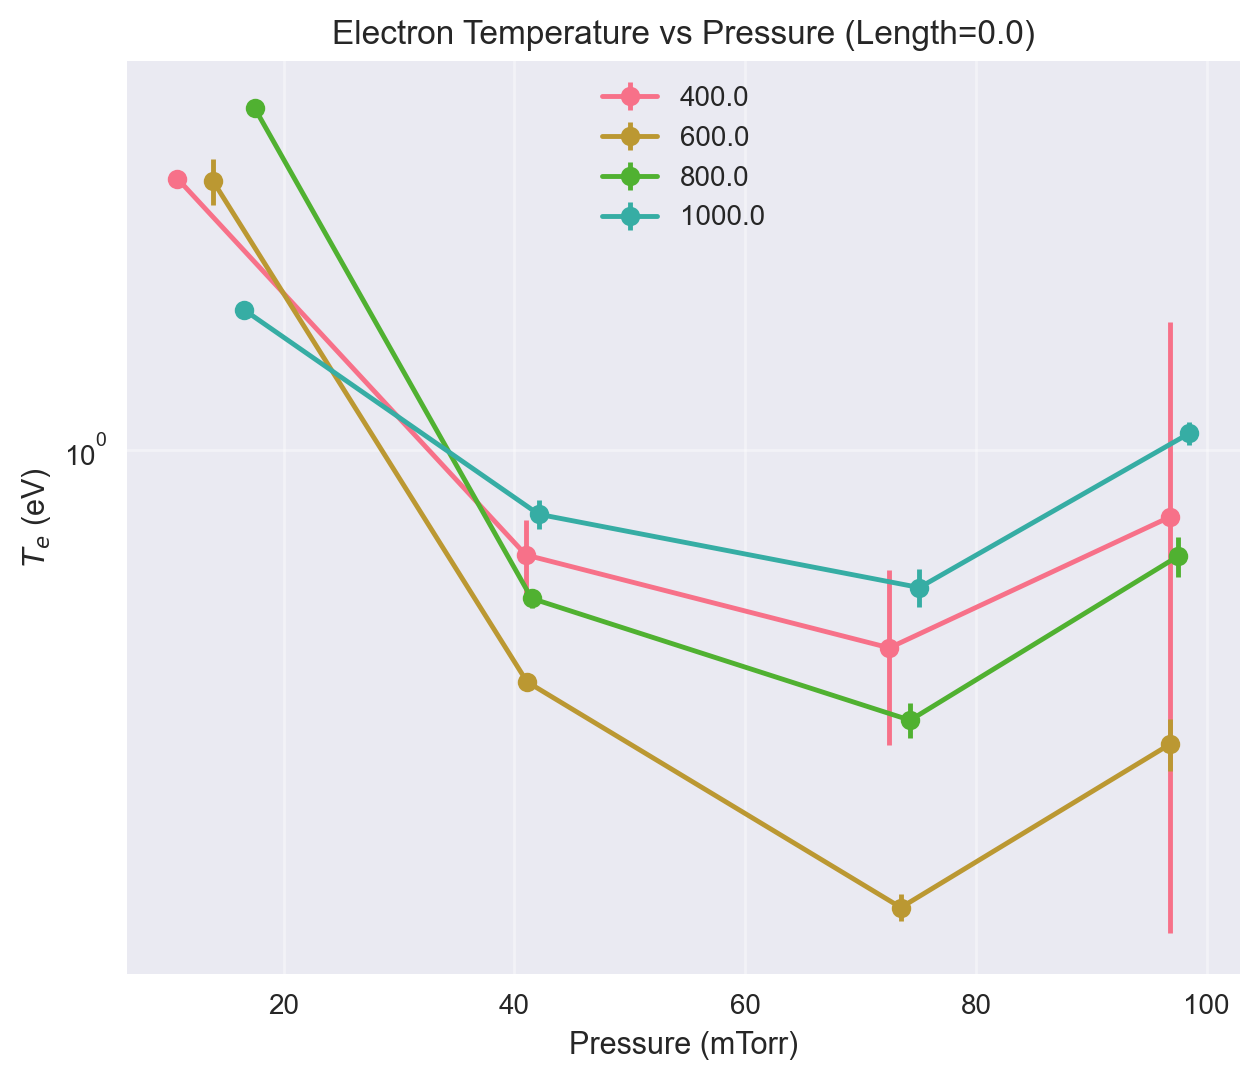

Plotting for Length = 2.0 ...
[ 400.  600.  800. 1000.]
[4.20363873e+18 6.00541329e+18 8.02888553e+18 9.81983912e+18]
[ 400.  600.  800. 1000.]
[3.54215488e+18 5.31232039e+18 7.34058097e+18 9.34812320e+18]
[ 400.  600.  800. 1000.]
[0.80553956 0.92131476 0.9785672  1.08417635]
[ 400.  600.  800. 1000.]
[0.9473843  1.10331328 1.23381002 1.26318634]
[41.3 97.8]
[3.54215488e+18 4.20363873e+18]
[41.3 98.2]
[5.31232039e+18 6.00541329e+18]
[41.3 98.2]
[7.34058097e+18 8.02888553e+18]
[41.6 98.8]
[9.34812320e+18 9.81983912e+18]
[41.3 97.8]
[0.9473843  0.80553956]
[41.3 98.2]
[1.10331328 0.92131476]
[41.3 98.2]
[1.23381002 0.9785672 ]
[41.6 98.8]
[1.26318634 1.08417635]


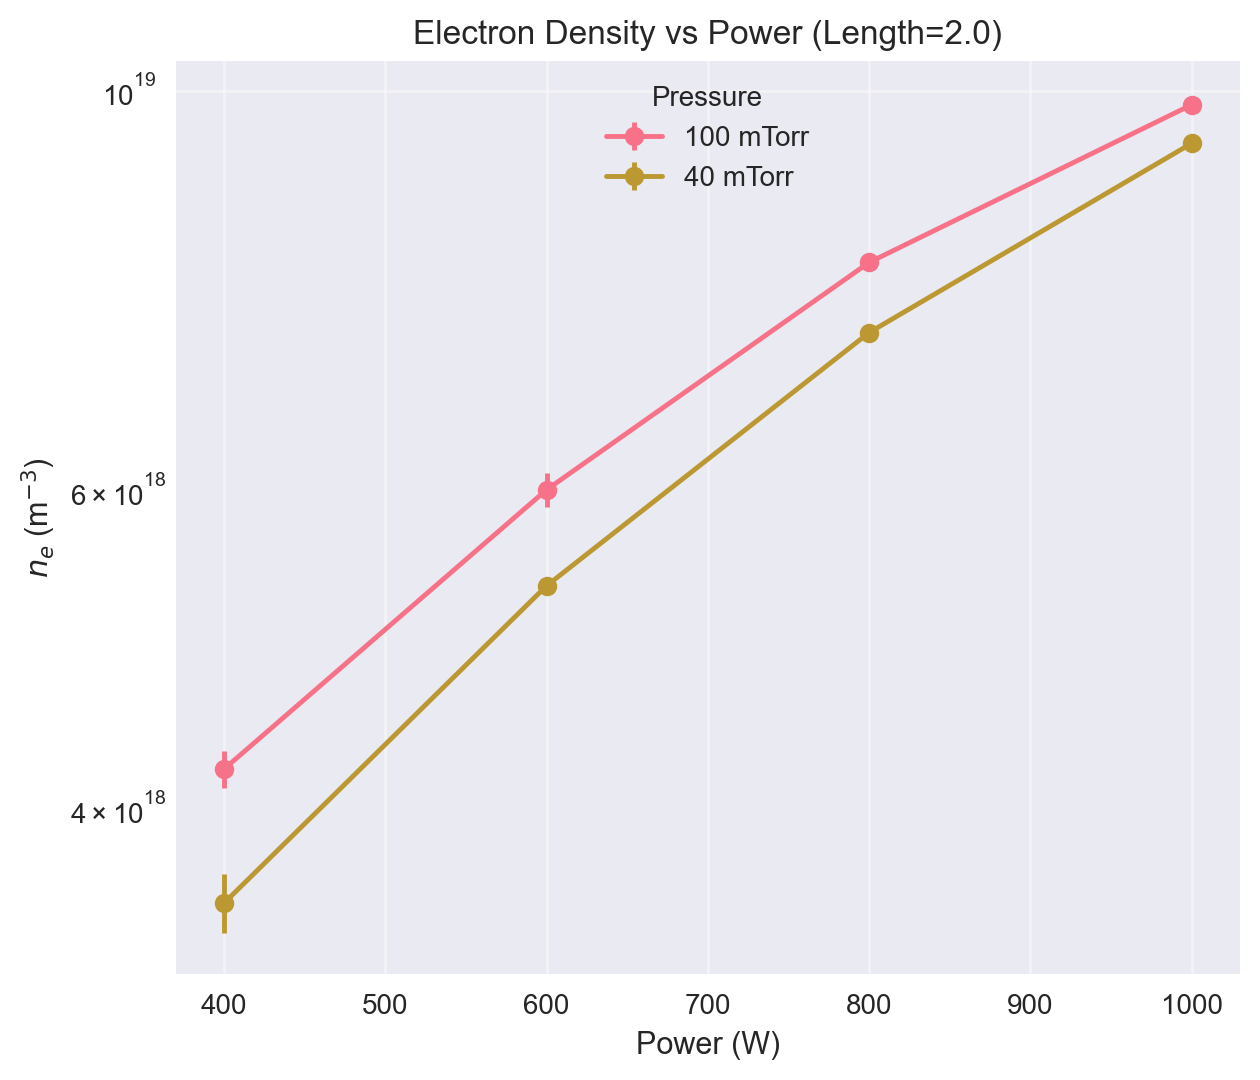

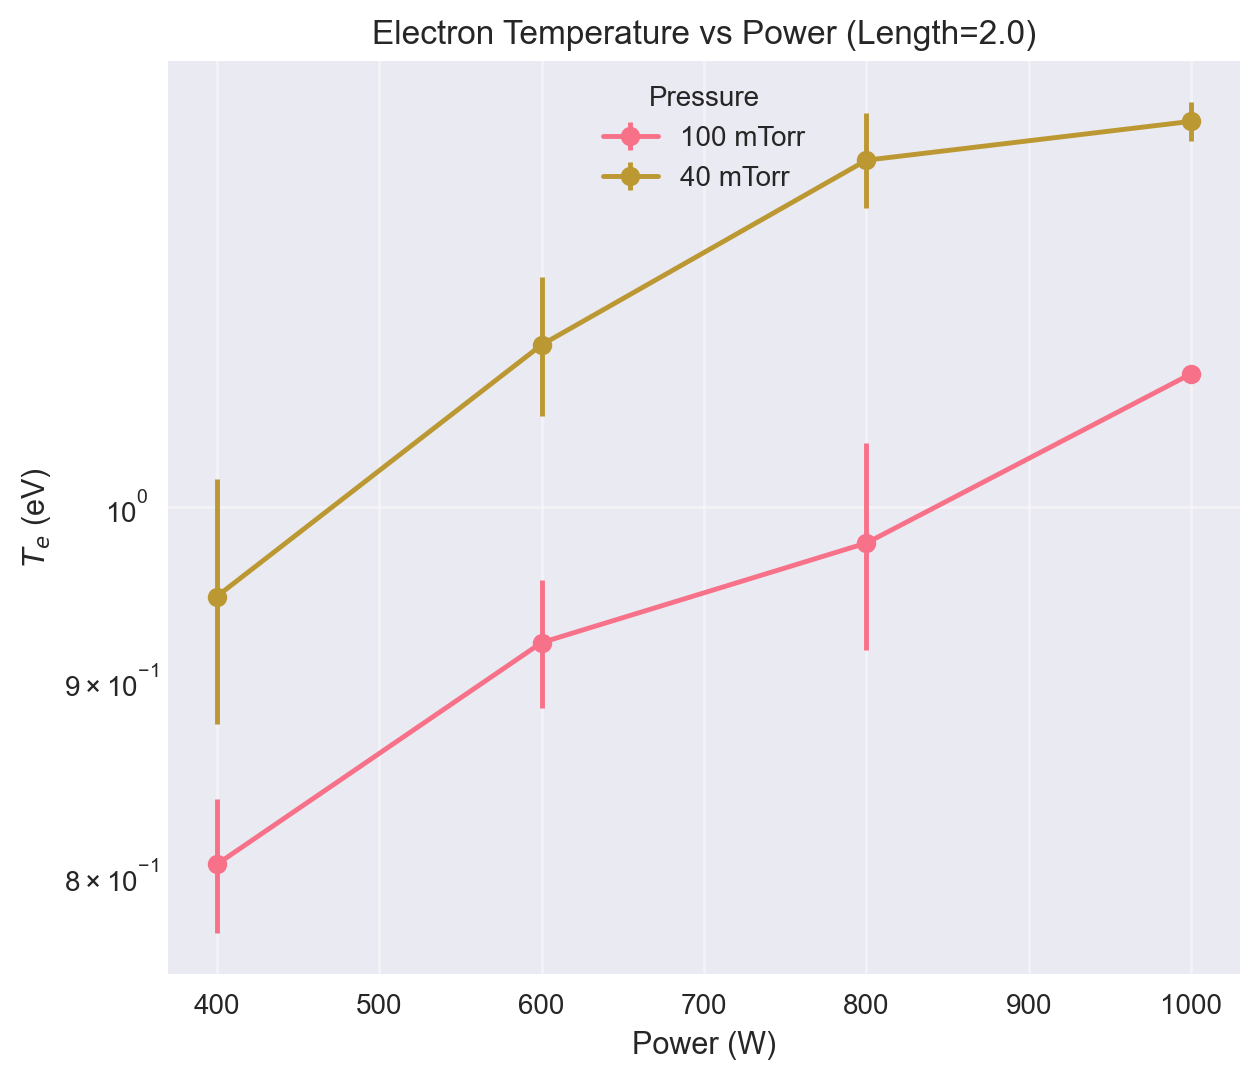

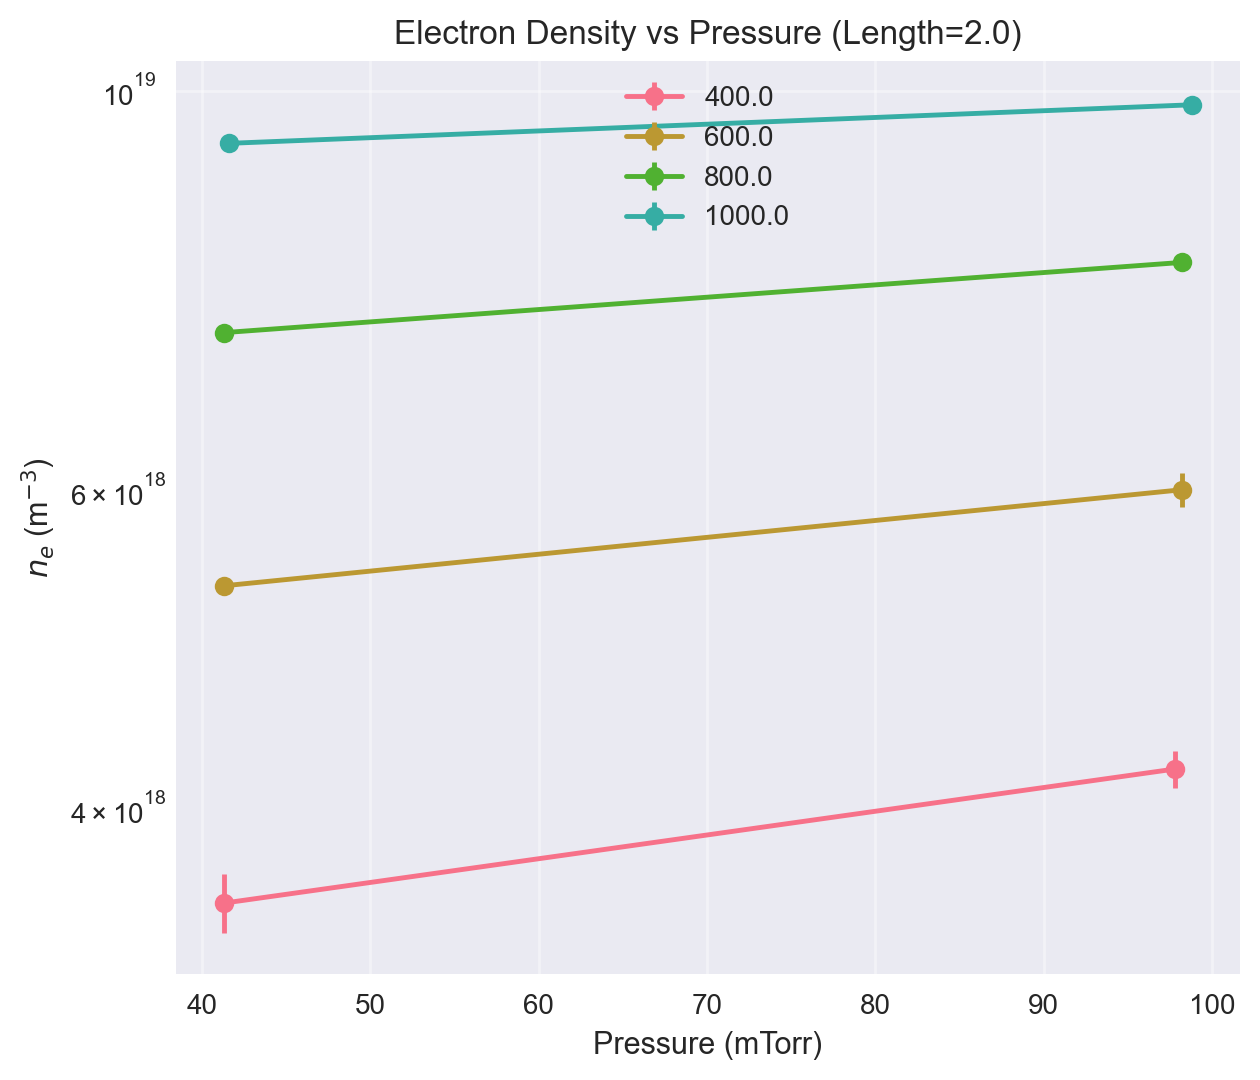

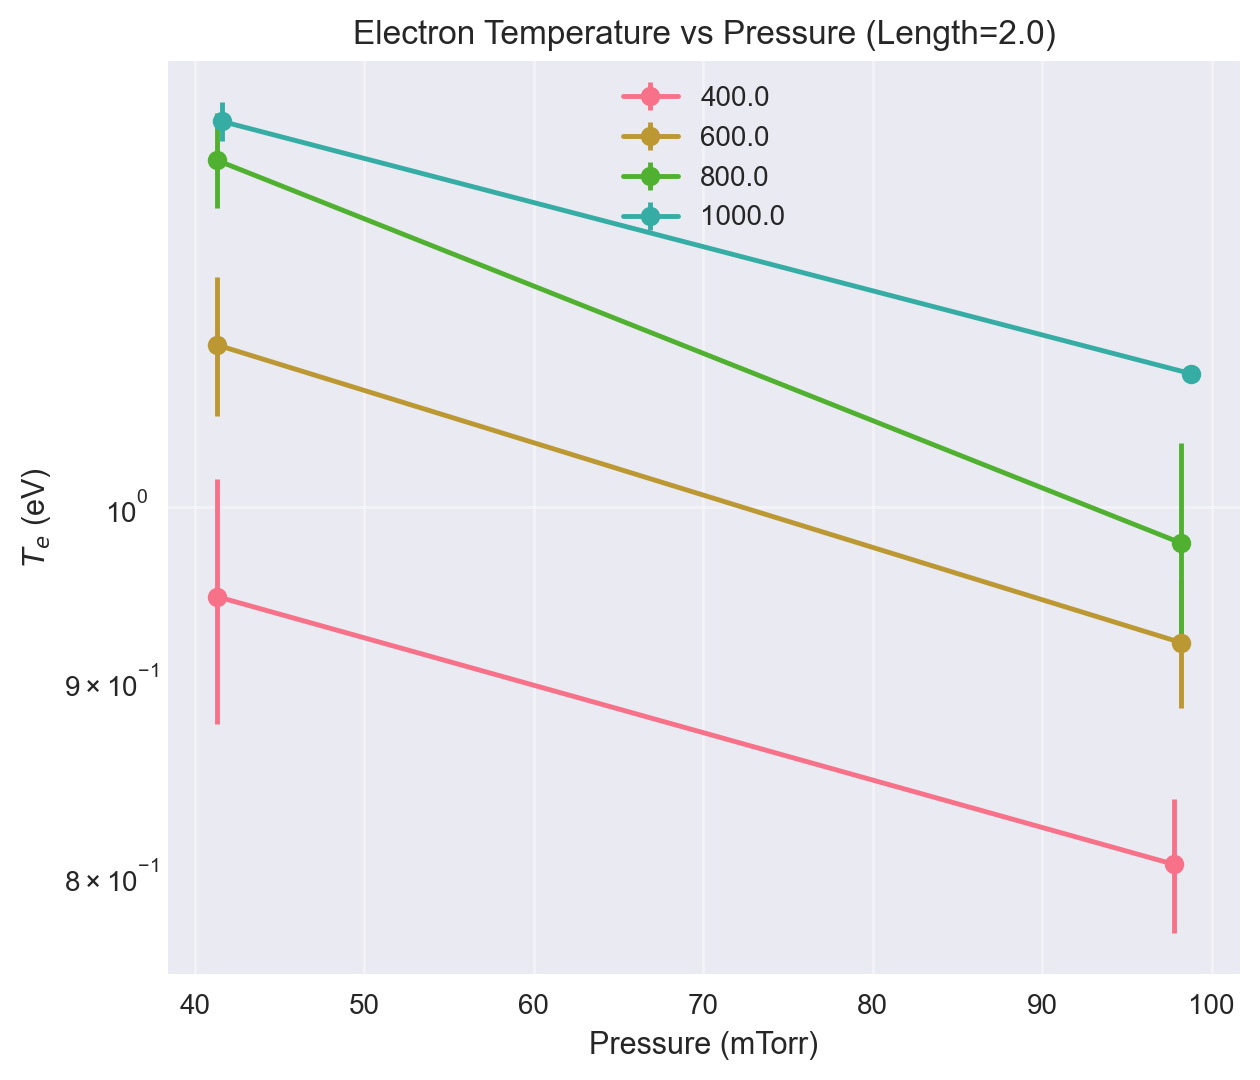

Plotting for Length = 4.0 ...
[ 400.  600.  800. 1000.]
[2.48533456e+18 2.94379509e+18 4.83978799e+18 4.83106251e+18]
[ 400.  600.  800. 1000.]
[2.97468008e+18 4.76176704e+18 6.79062586e+18 8.87548153e+18]
[ 400.  600.  800. 1000.]
[0.76233344 0.88105763 1.27656288 1.03622361]
[ 400.  600.  800. 1000.]
[0.91297442 0.94563149 1.06553438 1.26134837]
[40.9 97.2]
[2.97468008e+18 2.48533456e+18]
[40.9 98. ]
[4.76176704e+18 2.94379509e+18]
[41.2 98.4]
[6.79062586e+18 4.83978799e+18]
[41.2 98.9]
[8.87548153e+18 4.83106251e+18]
[40.9 97.2]
[0.91297442 0.76233344]
[40.9 98. ]
[0.94563149 0.88105763]
[41.2 98.4]
[1.06553438 1.27656288]
[41.2 98.9]
[1.26134837 1.03622361]


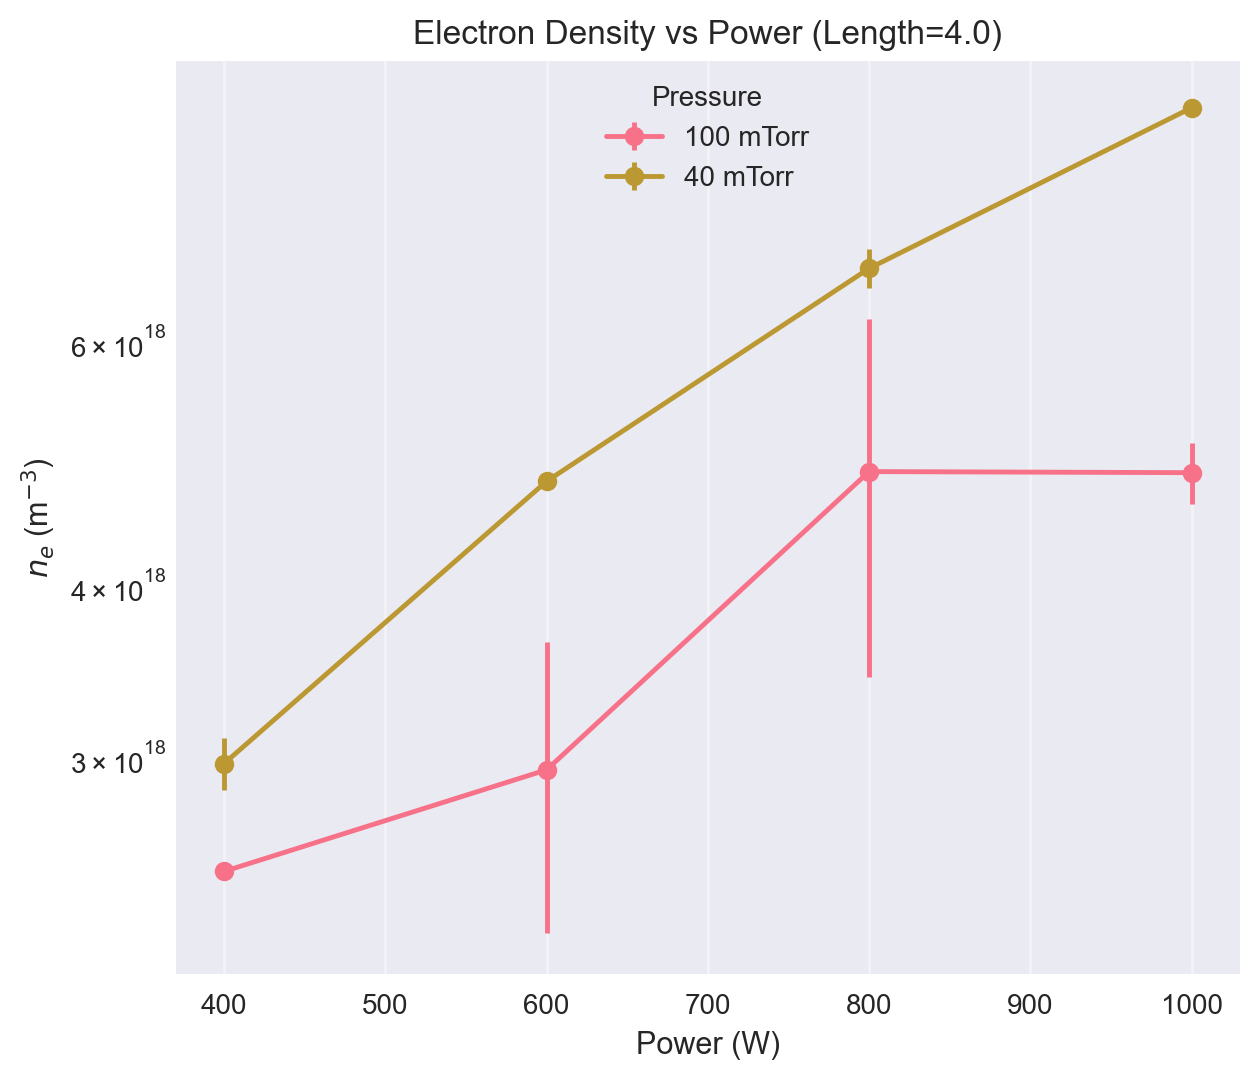

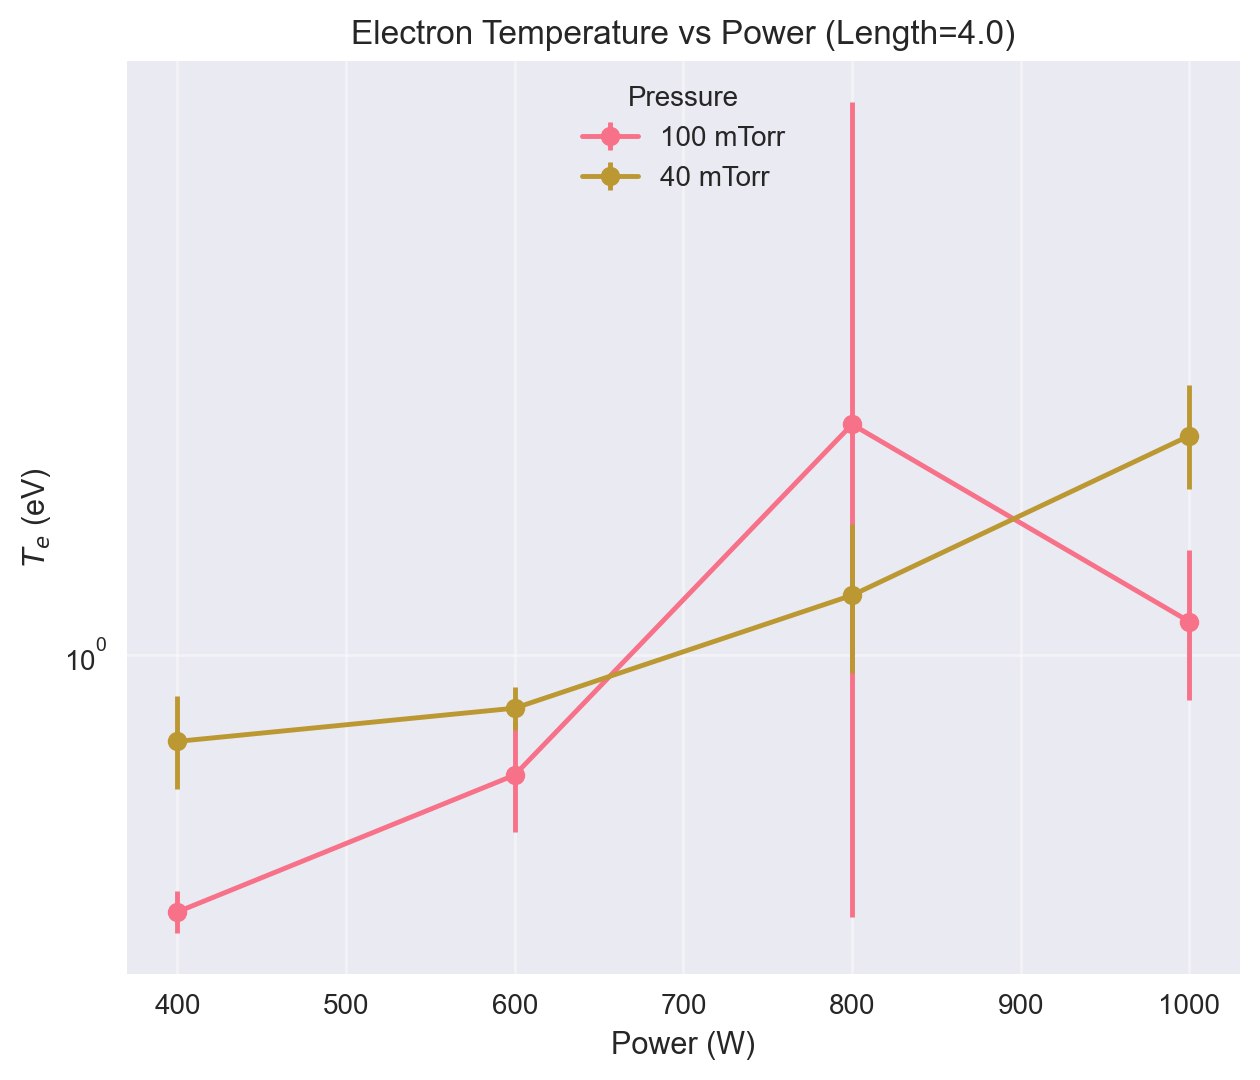

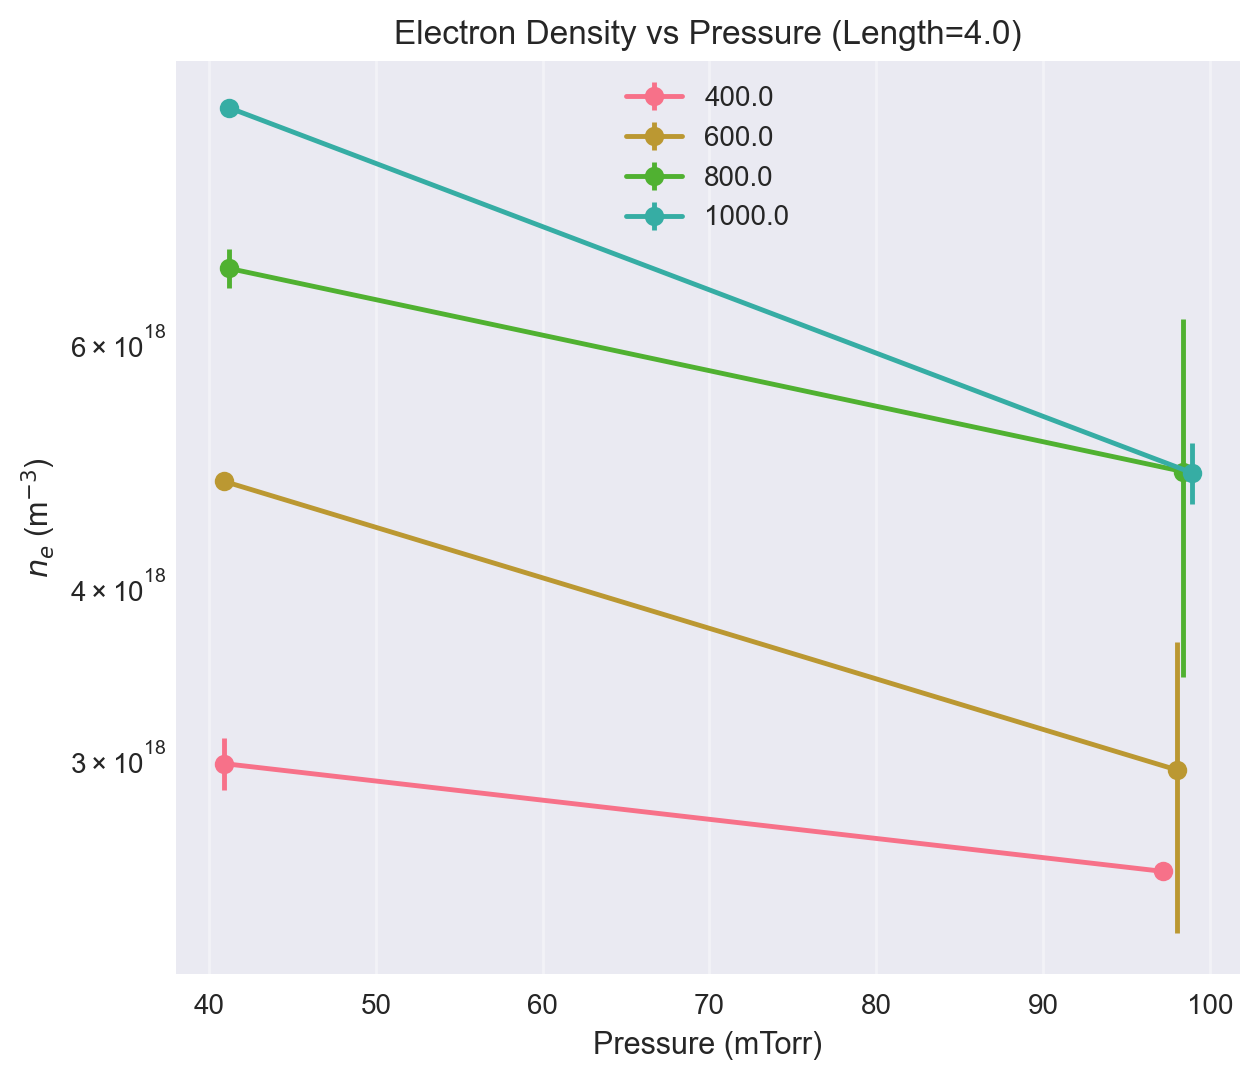

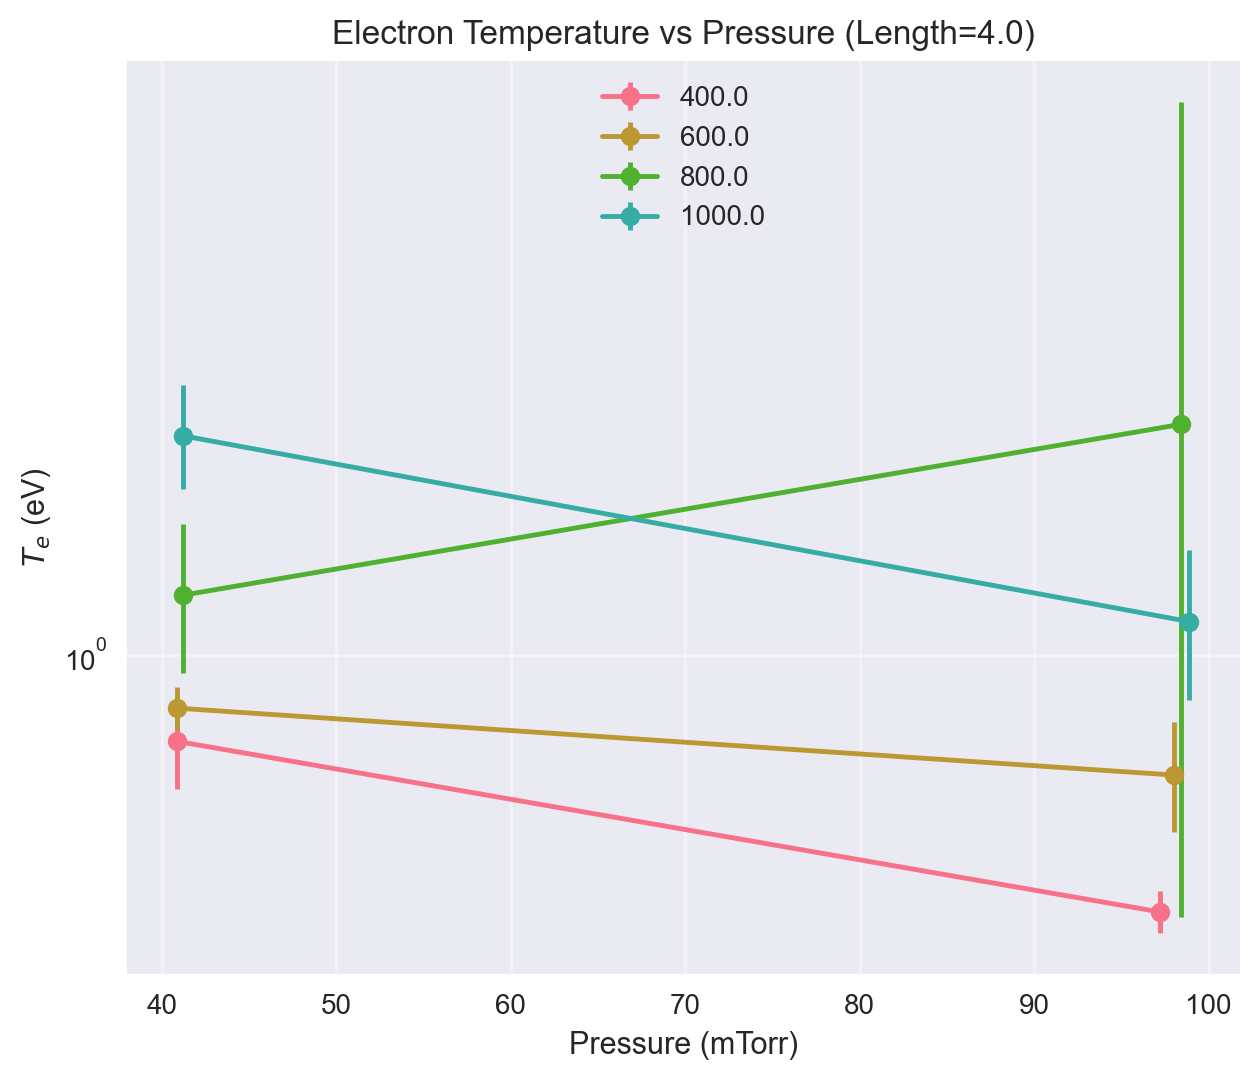

Plotting for Length = 6.0 ...
[ 400.  600.  800. 1000.]
[7.64864958e+17 8.34462849e+17 1.06523461e+18 1.26761322e+18]
[ 400.  600.  800. 1000.]
[1.20912747e+18 1.88857250e+18 2.64953093e+18 3.20690421e+18]
[ 400.  600.  800. 1000.]
[1.98279466 0.76156363 0.78958667 0.90967982]
[ 400.  600.  800. 1000.]
[0.88655109 0.92987398 0.92613652 1.02585953]
[40.8 97. ]
[1.20912747e+18 7.64864958e+17]
[41.  97.6]
[1.88857250e+18 8.34462849e+17]
[41.1 98.1]
[2.64953093e+18 1.06523461e+18]
[41.2 98.5]
[3.20690421e+18 1.26761322e+18]
[40.8 97. ]
[0.88655109 1.98279466]
[41.  97.6]
[0.92987398 0.76156363]
[41.1 98.1]
[0.92613652 0.78958667]
[41.2 98.5]
[1.02585953 0.90967982]


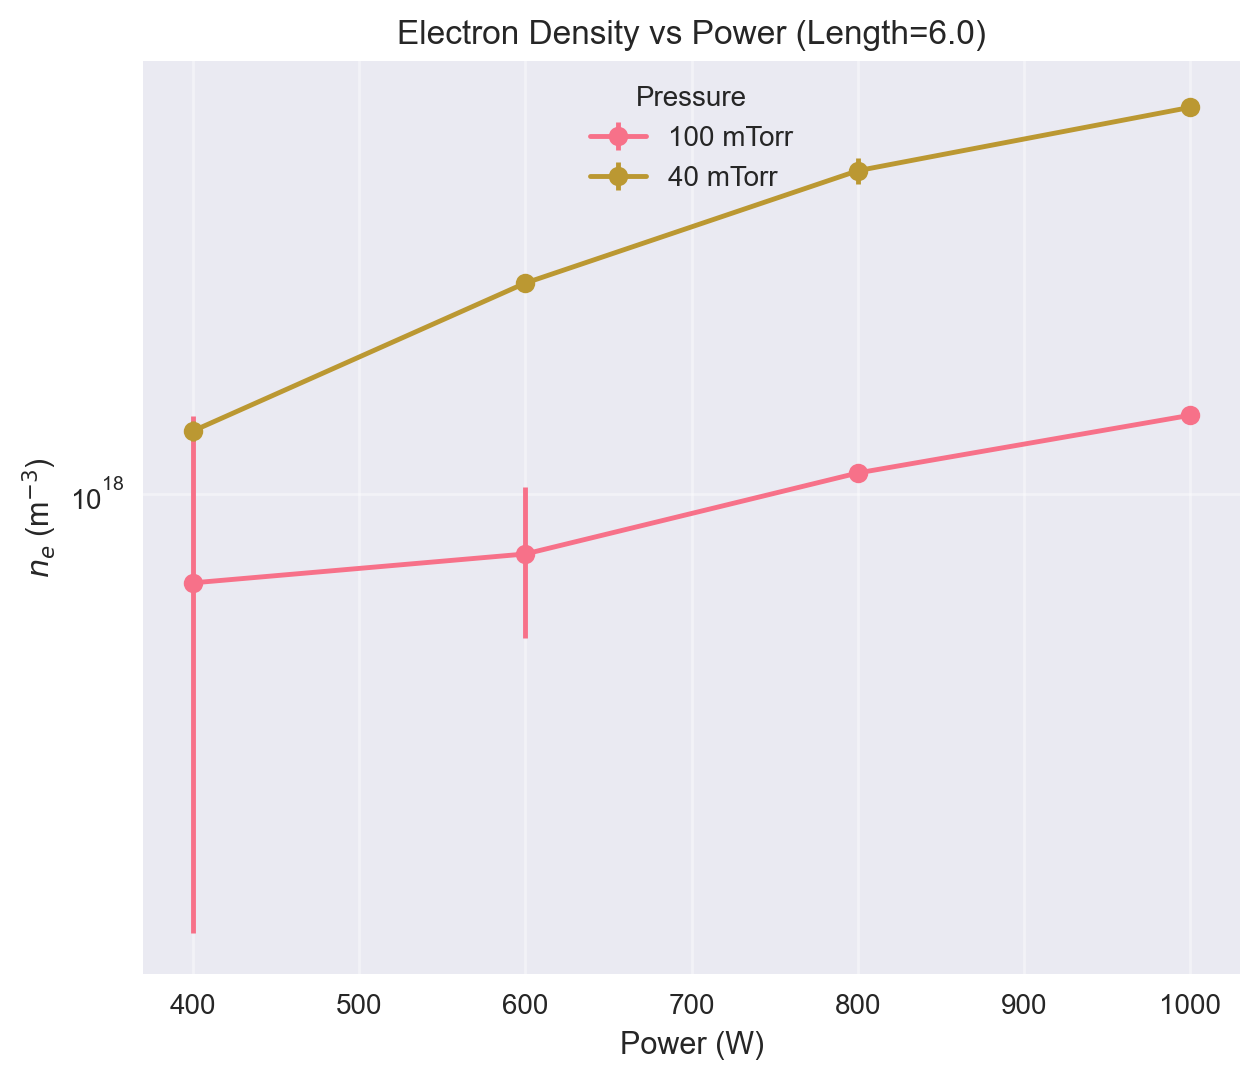

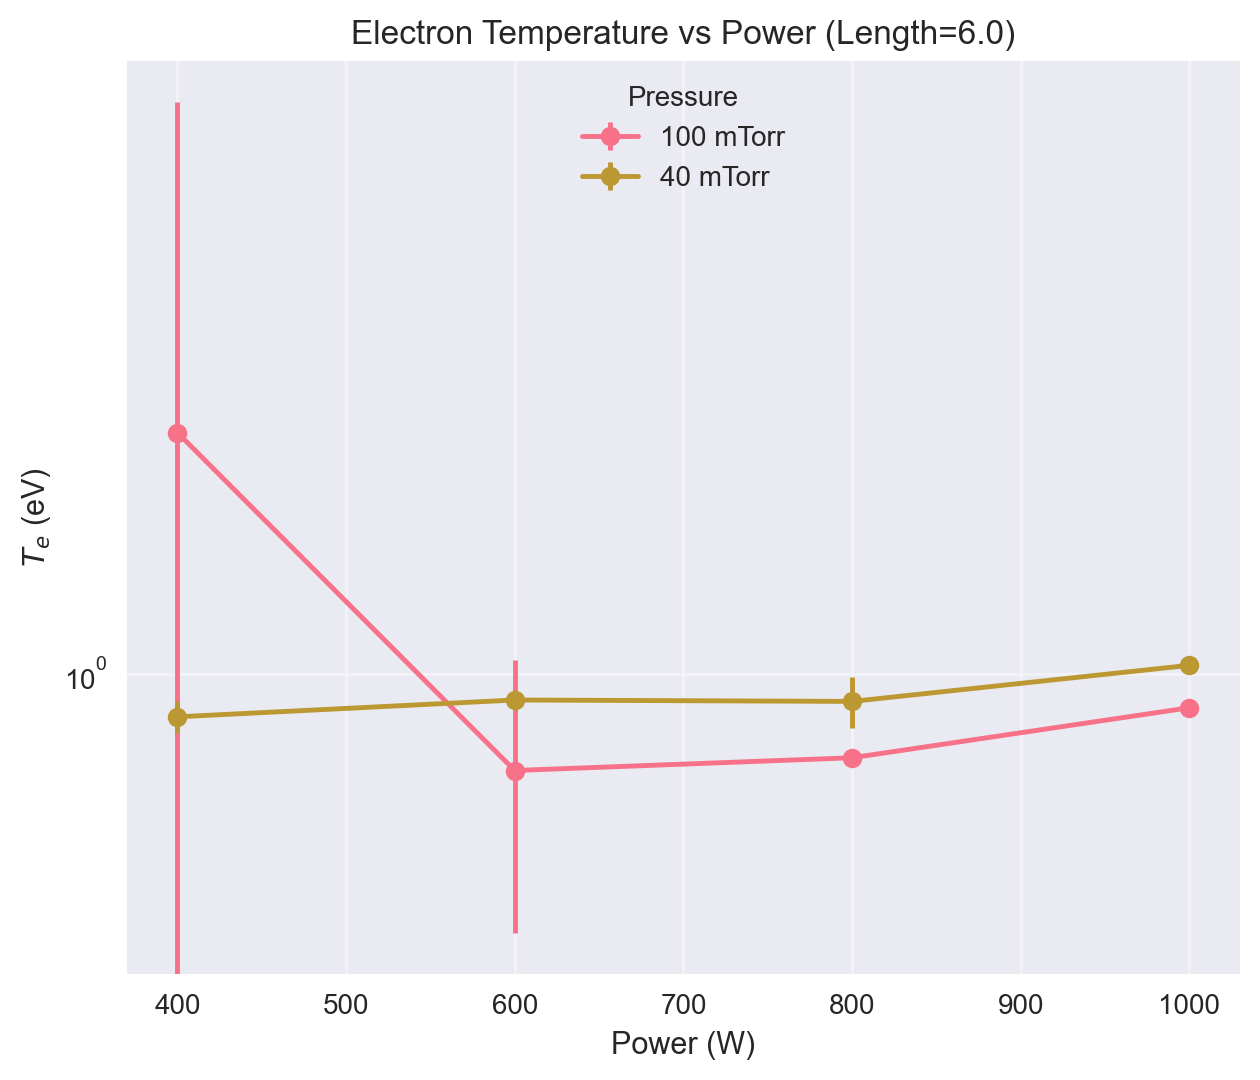

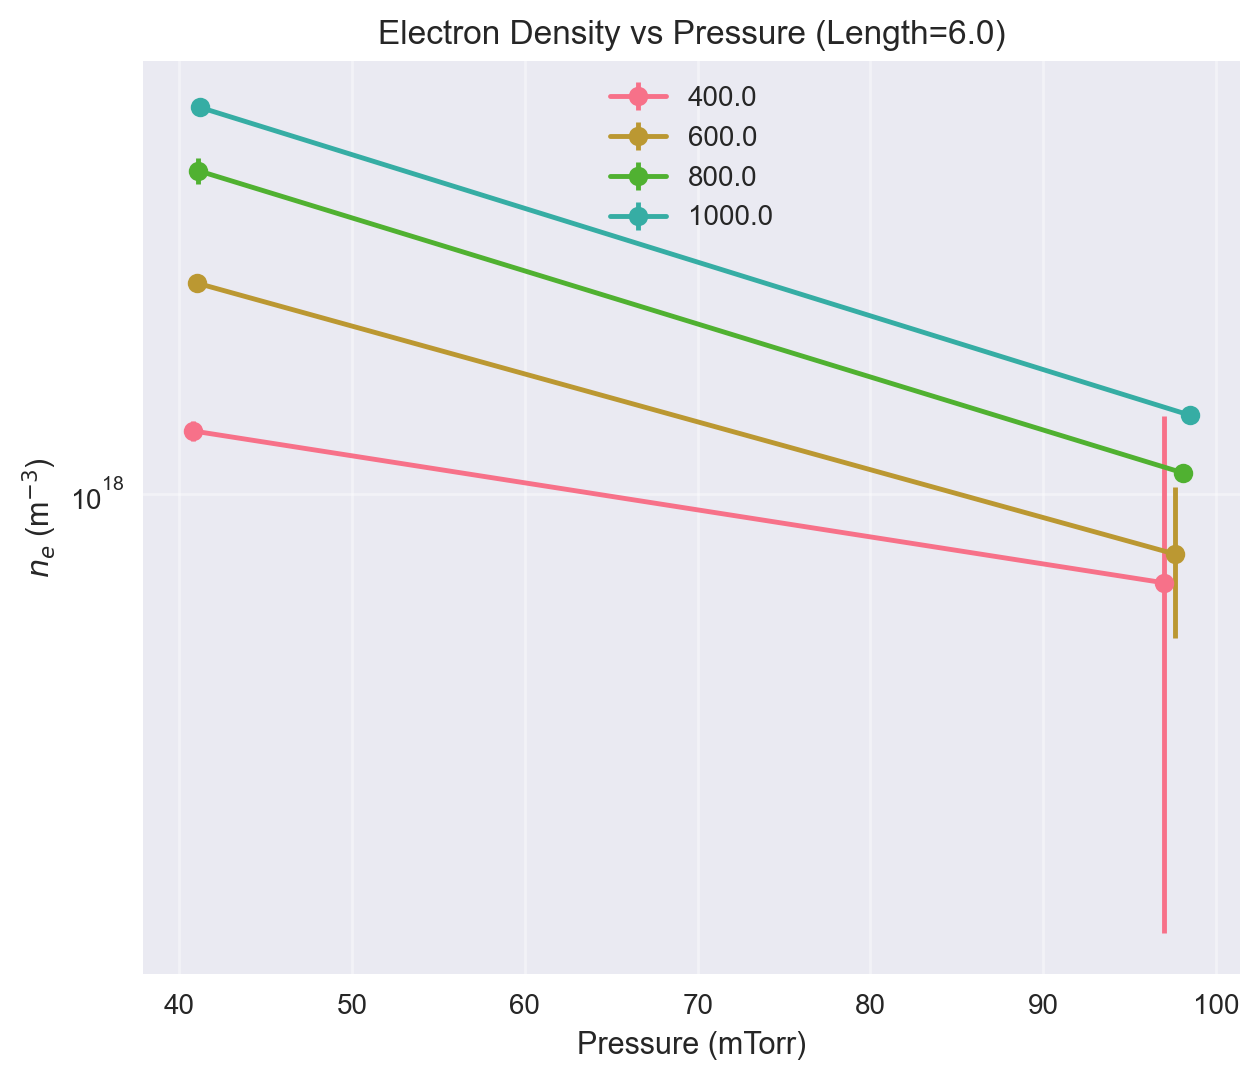

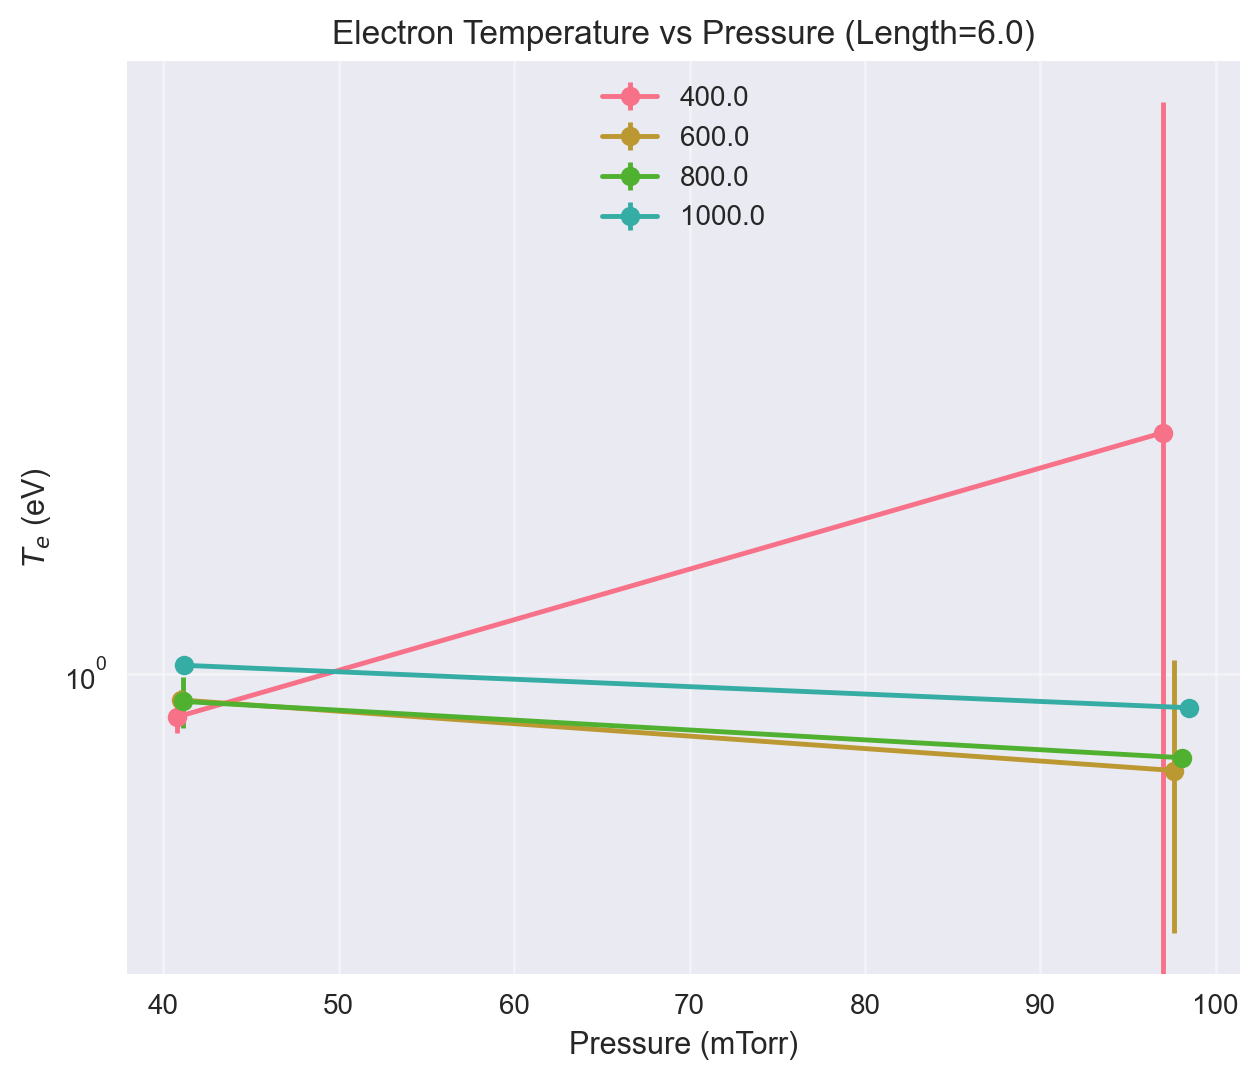

In [ ]:
def plot_ne_te_length(data):
    """
    Plots ne vs Pressure, Te vs Pressure, ne vs Power, and Te vs Power
    for each unique Length in the dataset.
    """
    lengths = sorted(data['Length'].dropna().unique())
    
    for L in lengths:
        data_len = data[data['Length'] == L]
        print(f"Plotting for Length = {L} ...")
        
        # Electron density vs Power
        plot_grouped(data_len, 'Power', 'PressureGroup', 'ne',
                     'Power (W)', r'$n_e$ (m$^{-3}$)',
                     f'Electron Density vs Power (Length={L})')
        
        # Electron temperature vs Power
        plot_grouped(data_len, 'Power', 'PressureGroup', 'Te',
                     'Power (W)', r'$T_e$ (eV)',
                     f'Electron Temperature vs Power (Length={L})')
        
        # Electron density vs Pressure
        plot_grouped(data_len, 'Pressure', 'Power', 'ne',
                     'Pressure (mTorr)', r'$n_e$ (m$^{-3}$)',
                     f'Electron Density vs Pressure (Length={L})')
        
        # Electron temperature vs Pressure
        plot_grouped(data_len, 'Pressure', 'Power', 'Te',
                     'Pressure (mTorr)', r'$T_e$ (eV)',
                     f'Electron Temperature vs Pressure (Length={L})')
        
        plt.show()

plot_ne_te_length(data_all)



In [17]:

def subplot_aware(func):

    @wraps(func)
    def wrapper(*args, ax=None, **kwargs):
        created_figure = False
        if ax is None:
            fig, ax = plt.subplots(dpi=200)
            created_figure = True

        result = func(*args, ax=ax, **kwargs)

        if created_figure:
            plt.tight_layout()
            plt.show()

        return result
    return wrapper


@subplot_aware
def plot_grouped(data, xcol, groupcol, ycol, xlabel, ylabel, title,
                 logy=True, legend_outside=True, ax=None):
    plotted_any = False

    for g in sorted(data[groupcol].dropna().unique()):
        sub = data[data[groupcol] == g]
        if sub.empty:
            continue

        grouped = sub.groupby(xcol).agg({ycol: ['mean', 'std']})
        if grouped.empty:
            continue

        x = grouped.index.values
        y = grouped[ycol]['mean'].values
        yerr = grouped[ycol]['std'].values

        ax.errorbar(x, y, yerr=yerr, fmt='o-', capsize=4, label=f'{g}')
        plotted_any = True

    if not plotted_any:
        ax.set_visible(False)
        return

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, alpha=0.4)

    # === Axis scaling ===
    if logy:
        ax.set_yscale('log')

    # === Smart X limits ===
    xdata = data[xcol].dropna().values
    if len(xdata) > 0:
        xmin, xmax = np.min(xdata), np.max(xdata)
        span = xmax - xmin if xmax != xmin else xmax * 0.1 or 1
        ax.set_xlim(xmin - 0.05 * span, xmax + 0.05 * span)

    ax.legend(title=groupcol[:-5] if groupcol.endswith('Group') else groupcol,
              loc='best', fontsize=8)


def plot_ne_te_length(data):
    """
    Creates 4 figures:
    Each figure corresponds to a plot type (e.g. ne vs Power),
    and contains subplots for each Length arranged in a 2×2 grid.
    Uses log scale for ne plots and linear scale for Te plots.
    """
    lengths = sorted(data['Length'].dropna().unique())

    # Define the four plot types in compact structure
    plot_types = [
        ('Power', 'PressureGroup', 'ne', 'Power (W)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Power', True),
        ('Power', 'PressureGroup', 'Te', 'Power (W)', r'$T_e$ (eV)', 'Electron Temperature vs Power', False),
        ('Pressure', 'Power', 'ne', 'Pressure (mTorr)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Pressure', True),
        ('Pressure', 'Power', 'Te', 'Pressure (mTorr)', r'$T_e$ (eV)', 'Electron Temperature vs Pressure', False)
    ]

    for xcol, groupcol, ycol, xlabel, ylabel, title, logy in plot_types:
        # Create up to 2x2 subplots per plot type
        n = len(lengths)
        nrows, ncols = 2, 2
        fig, axes = plt.subplots(nrows, ncols, figsize=(10, 8), dpi=200, sharey=False)
        axes = axes.flatten()

        #fig.suptitle(title, fontsize=14)

        for i, L in enumerate(lengths):
            ax = axes[i]
            data_len = data[data['Length'] == L]
            plot_grouped(data_len, xcol, groupcol, ycol,
                         xlabel, ylabel,
                         f'{title}\n(L={L})',
                         ax=ax, logy=logy)

        # Hide unused subplots if fewer than 4 lengths
        for j in range(len(lengths), len(axes)):
            axes[j].axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


In [18]:
# plot_ne_te_length(data_all)

In [3]:
c1.set_params(float('10.8'), 400, 1, 0)






In [4]:
te,ne,ie = compute.find_ne_te_iterative(c1)
print(te)

Converged after 68 iterations.
2.051671826735771


In [8]:
eedf_data = compute_eedf(c1,ie,ne)

print(eedf_data)


(array([2.82645334e-02, 7.61389840e-02, 1.26851569e-01, 1.77848350e-01,
       2.28513252e-01, 2.76673805e-01, 3.27479850e-01, 3.77976905e-01,
       4.25637733e-01, 4.76895820e-01, 5.27680885e-01, 5.78652870e-01,
       6.26361381e-01, 6.77287589e-01, 7.27616798e-01, 7.78806220e-01,
       8.26299201e-01, 8.76986991e-01, 9.28103935e-01, 9.75858222e-01,
       1.02704764e+00, 1.07764007e+00, 1.12835075e+00, 1.17634536e+00,
       1.22710563e+00, 1.27788688e+00, 1.32871772e+00, 1.37656928e+00,
       1.42780448e+00, 1.47858955e+00, 1.52953864e+00, 1.57634116e+00,
       1.62767173e+00, 1.67847968e+00, 1.72594787e+00, 1.77732612e+00,
       1.82801582e+00, 1.87910796e+00, 1.92679168e+00, 1.97743178e+00,
       2.02852393e+00, 2.07949973e+00, 2.12680198e+00, 2.17820502e+00,
       2.22872497e+00, 2.27671958e+00, 2.32697822e+00, 2.37795020e+00,
       2.42868568e+00, 2.47634650e+00, 2.52722503e+00, 2.57829429e+00,
       2.62902976e+00, 2.67742873e+00, 2.72780753e+00, 2.77823211e+00,
     

In [9]:
f,area = normalize_eedf(eedf_data[0], eedf_data[2], ne)
print(f)


Normalized EEDF integral: 1.1523195272011482e+45
[0.00029881 0.00051086 0.00068576 0.0008432  0.00099116 0.00112955
 0.00127125 0.00141125 0.00154587 0.00168742 0.00182876 0.00197135
 0.00210959 0.00225458 0.00239998 0.00254829 0.00269211 0.00284277
 0.00299575 0.00314497 0.0033014  0.00345857 0.00361763 0.00377405
 0.0039366  0.0041009  0.00426698 0.00442997 0.0046001  0.00477119
 0.00494423 0.00511223 0.00528923 0.00546703 0.00564103 0.00582305
 0.00600557 0.00619038 0.00637117 0.00655843 0.00674803 0.00693902
 0.00712543 0.00732026 0.00751516 0.00770732 0.00790483 0.00810507
 0.00830643 0.008504   0.00870858 0.00894446 0.00915415 0.00936938
 0.00963225 0.00992008 0.01018663 0.01047589 0.0108147  0.0111233
 0.01141726 0.01170496 0.01204453 0.01236852 0.01270726 0.01306405
 0.01343427 0.01376296 0.01412307 0.01456232 0.01495906 0.01531499
 0.01569026 0.01614694 0.01654561 0.01694065 0.01734207 0.01781055
 0.01823122 0.01864364 0.01911036 0.01960341 0.02004547 0.02050642
 0.02102009 0.

In [10]:
k_eV = 8.617333262145e-5  # eV/K


bundle = EEDFBundle(
    E_eV=eedf_data[0],
    p_eV=eedf_data[1],
    f_eV=eedf_data[2],
    ne=ne,
    Te_K=te / k_eV
)

Normalized EEDF integral: 1.1523195272011482e+45


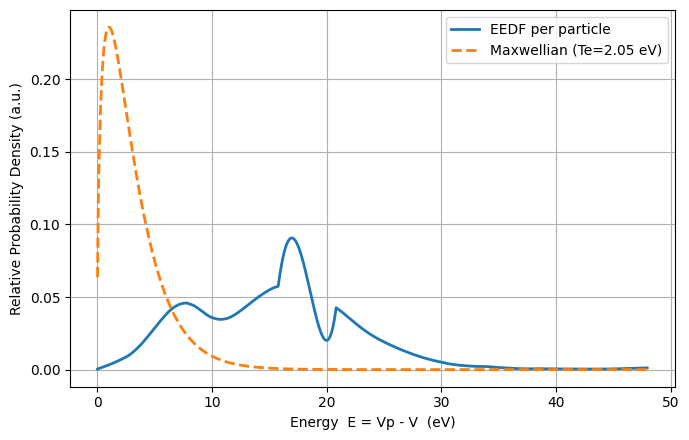

In [11]:
fig, ax = plot_eedf_vs_maxwellian(bundle)
plt.show()


for tup in 